# Sheet

In [870]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [871]:
df = pd.read_csv('IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [872]:
print(df.shape)
print(df.info())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [873]:
print(df.isnull().sum())
print(df.describe())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


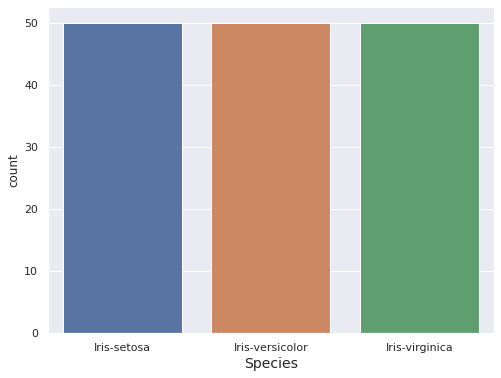

In [874]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df)
plt.xlabel('Species', fontsize=14)
plt.show()

<ipython-input-875-a1502fe01893>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal_length"], kde=True, color="red", bins=10)


<Axes: xlabel='sepal_length', ylabel='Density'>

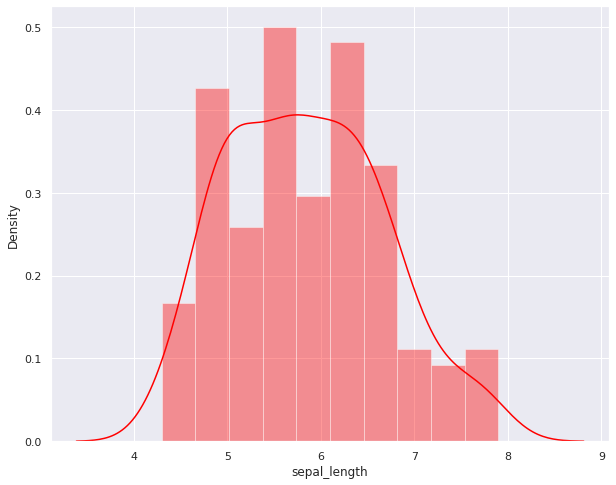

In [875]:
df['species'].value_counts()
sns.set(rc={'figure.figsize': (10, 8)})
sns.distplot(df["sepal_length"], kde=True, color="red", bins=10)

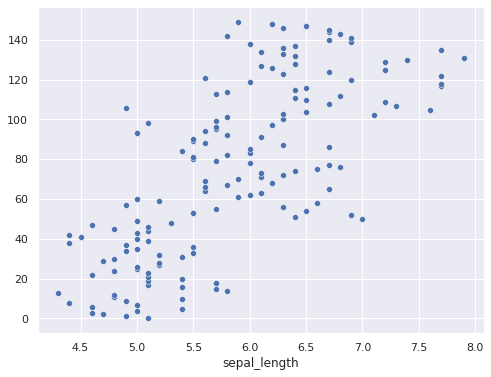

In [876]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="sepal_length", y=df.index, data=df)
plt.show()

<ipython-input-877-0b59c253b41d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal_width"], kde=True, color="navy", bins=10)


<Axes: xlabel='sepal_width', ylabel='Density'>

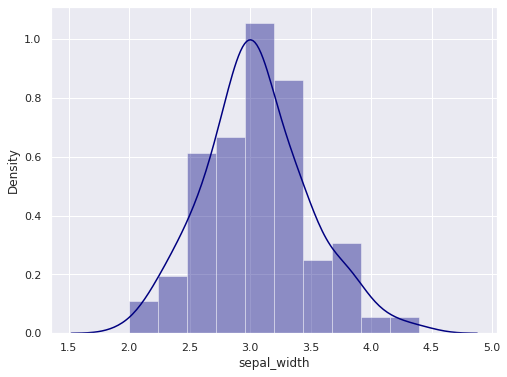

In [877]:
sns.set(rc={"figure.figsize": (8, 6)})
sns.distplot(df["sepal_width"], kde=True, color="navy", bins=10)

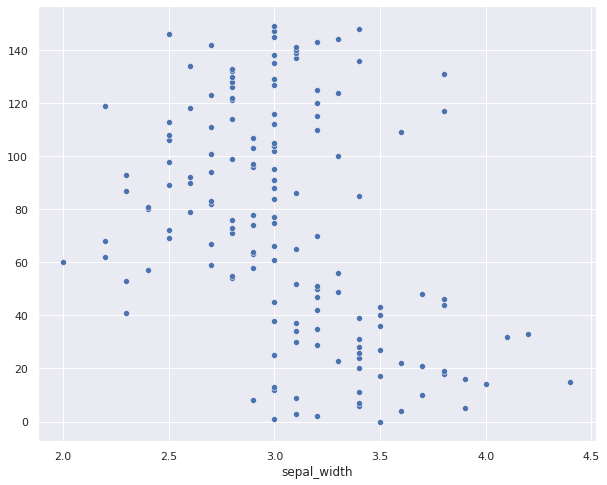

In [878]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="sepal_width", y=df.index, data=df)
plt.show()

<ipython-input-879-cf1c9f3bfd28>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['petal_length'], kde=True, color="blue", bins=10)


<Axes: xlabel='petal_length', ylabel='Density'>

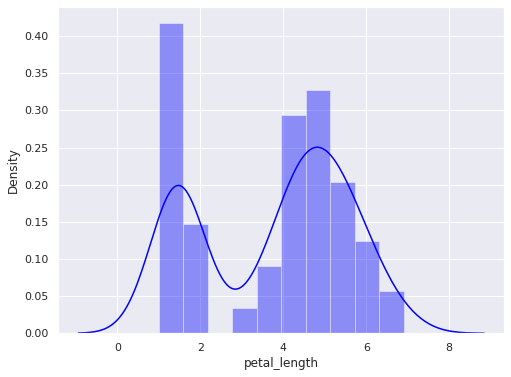

In [879]:
sns.set(rc={'figure.figsize': (8, 6)})
sns.distplot(df['petal_length'], kde=True, color="blue", bins=10)

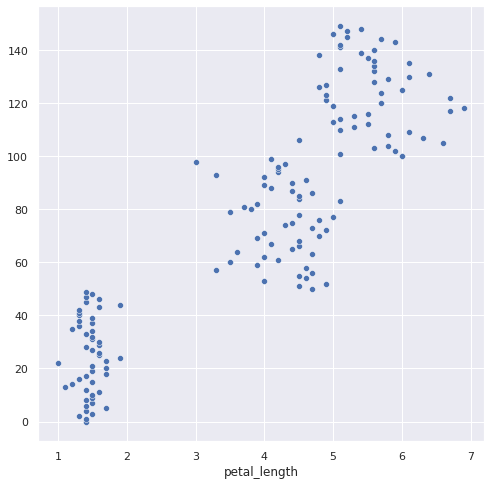

In [880]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x="petal_length", y=df.index, data=df)
plt.show()

<ipython-input-881-b2a91b606bb7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["petal_width"], kde=True, color="orange", bins=10)


<Axes: xlabel='petal_width', ylabel='Density'>

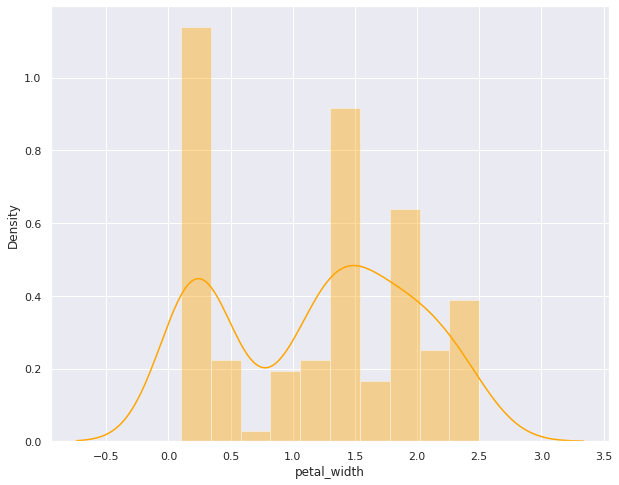

In [881]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.distplot(df["petal_width"], kde=True, color="orange", bins=10)

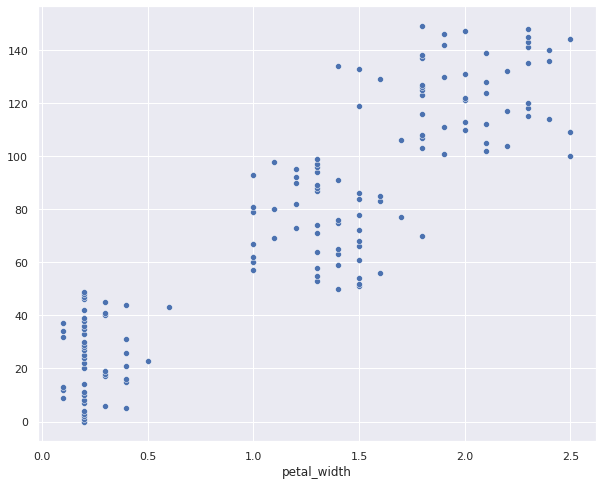

In [882]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="petal_width", y=df.index, data=df)
plt.show()

In [883]:
duplicate = df.duplicated()
print(duplicate.sum())

3


In [884]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [885]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


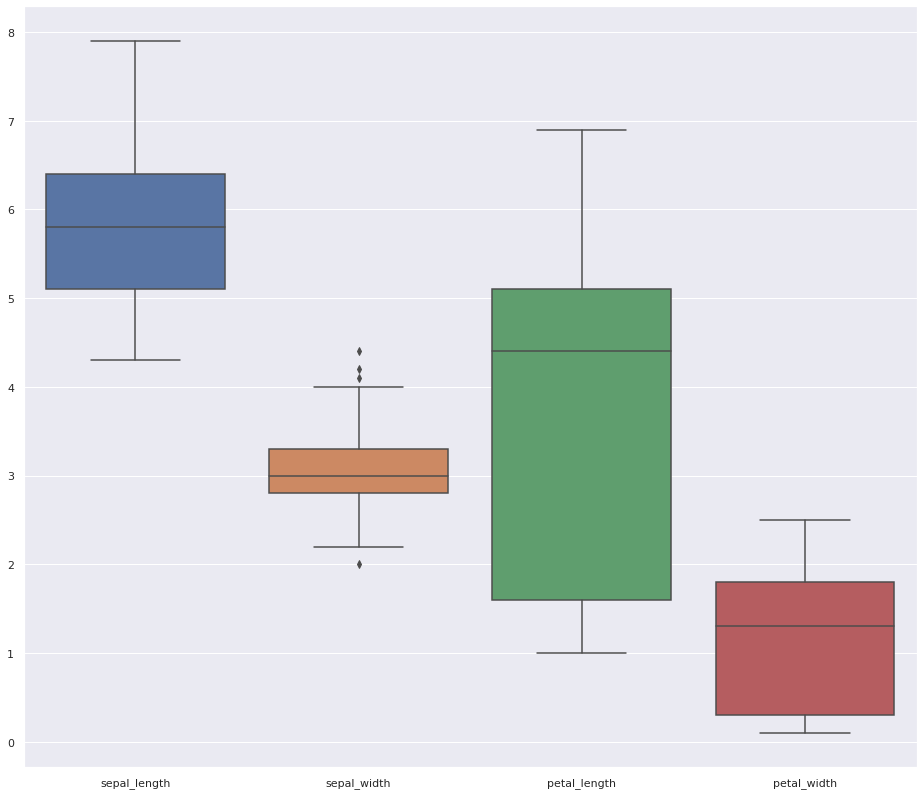

In [886]:
num_cols = df.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(16, 14))
sns.boxplot(num_cols)
plt.show()

In [887]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [888]:
for i in num_cols.columns:
    lower_range, upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

In [889]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

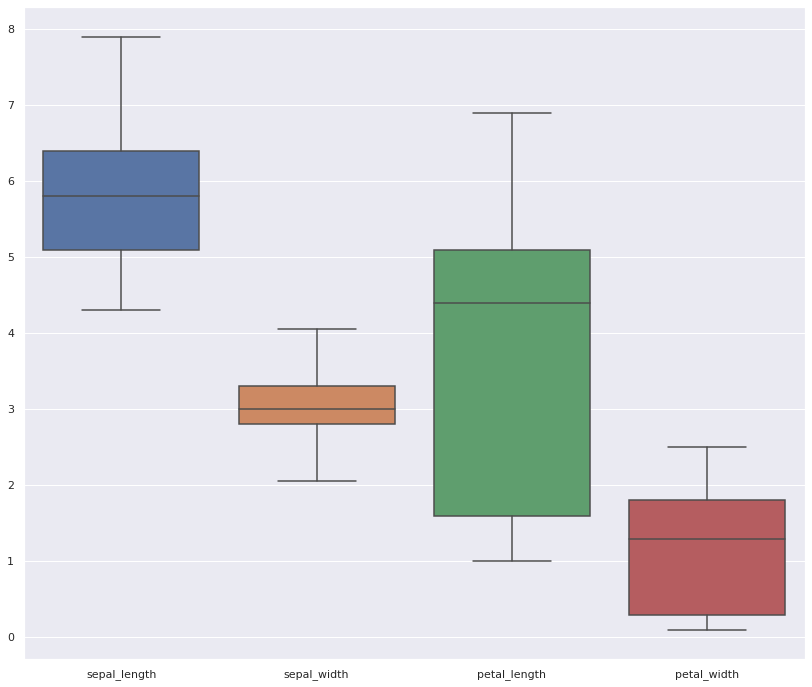

In [890]:
plt.figure(figsize=(14, 12))
sns.boxplot(num_cols)
plt.show()

In [891]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB
None


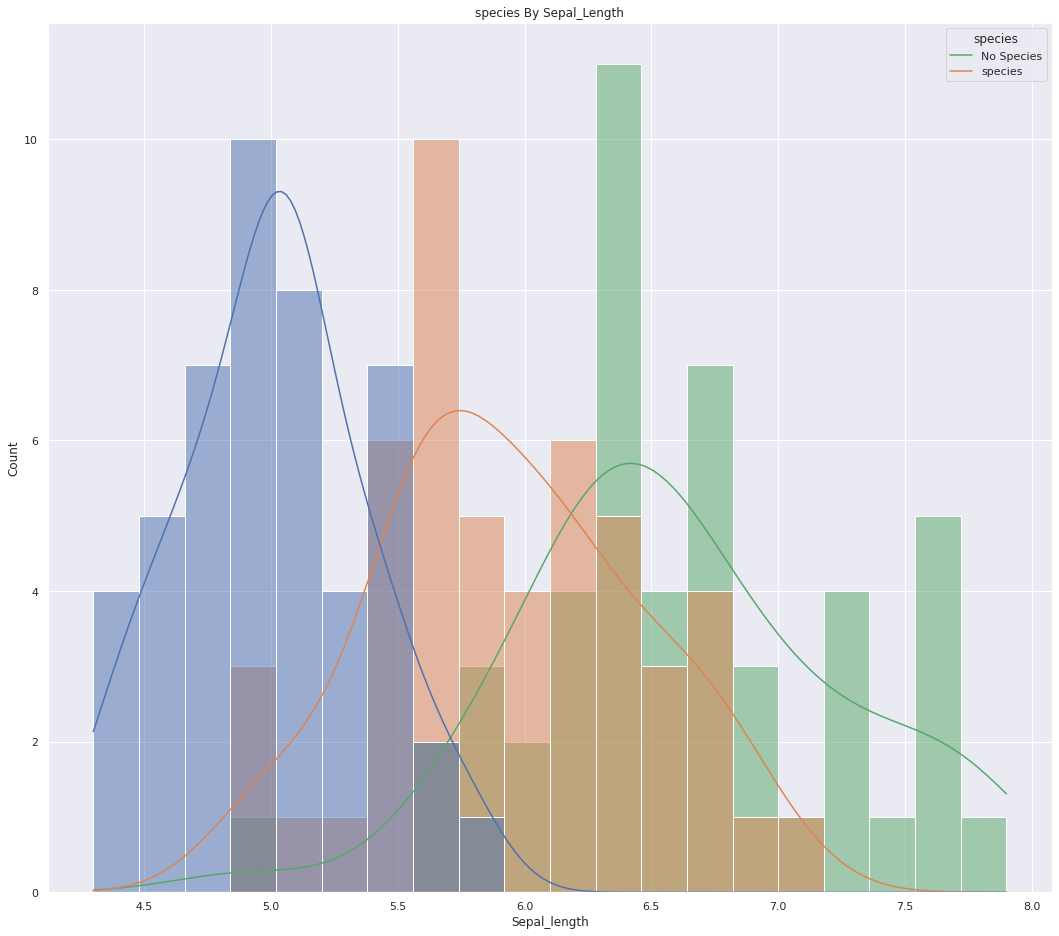

In [892]:
plt.figure(figsize=(18, 16))
sns.histplot(data=df, x="sepal_length", hue='species', kde=True, bins=20)
plt.title('species By Sepal_Length')
plt.xlabel('Sepal_length')
plt.ylabel('Count')
plt.legend(title='species', loc='upper right', labels=['No Species', 'species'])
plt.show()

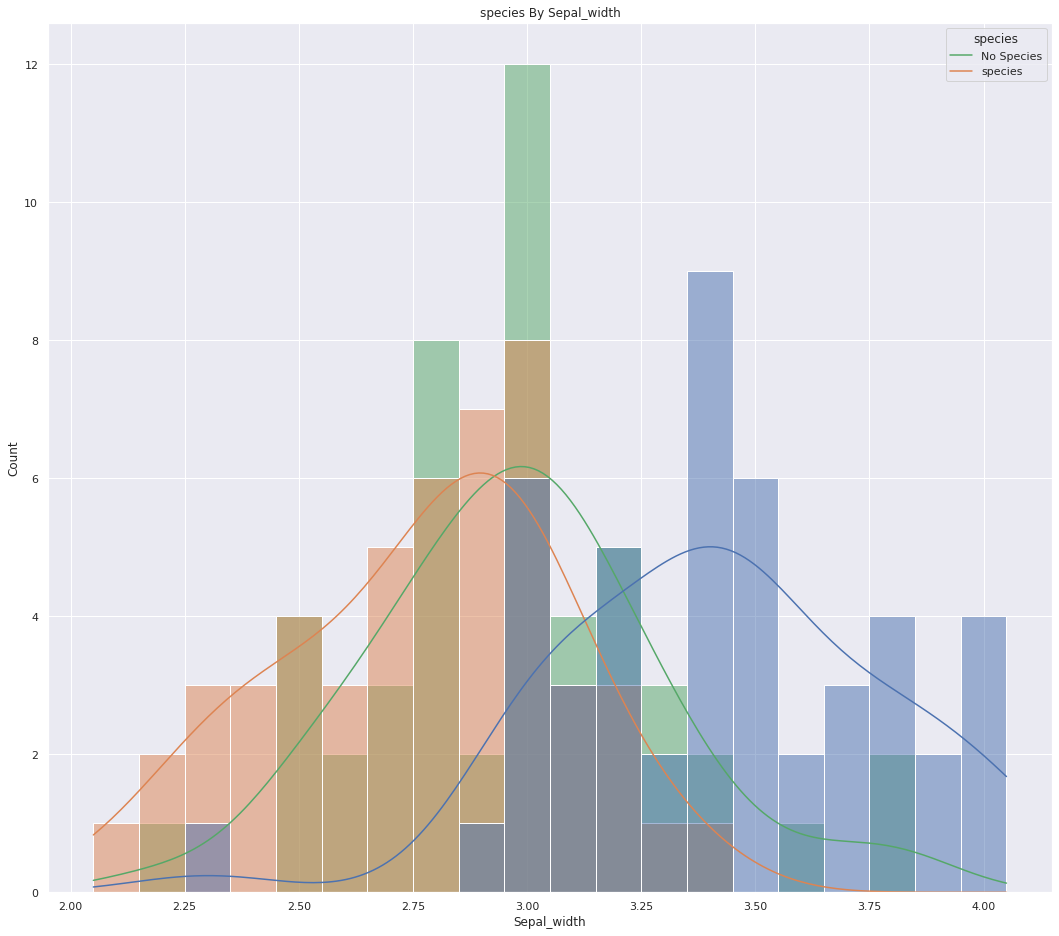

In [893]:
plt.figure(figsize=(18, 16))
sns.histplot(data=df, x="sepal_width", hue='species', kde=True, bins=20)
plt.title('species By Sepal_width')
plt.xlabel('Sepal_width')
plt.ylabel('Count')
plt.legend(title='species', loc='upper right', labels=['No Species', 'species'])
plt.show()

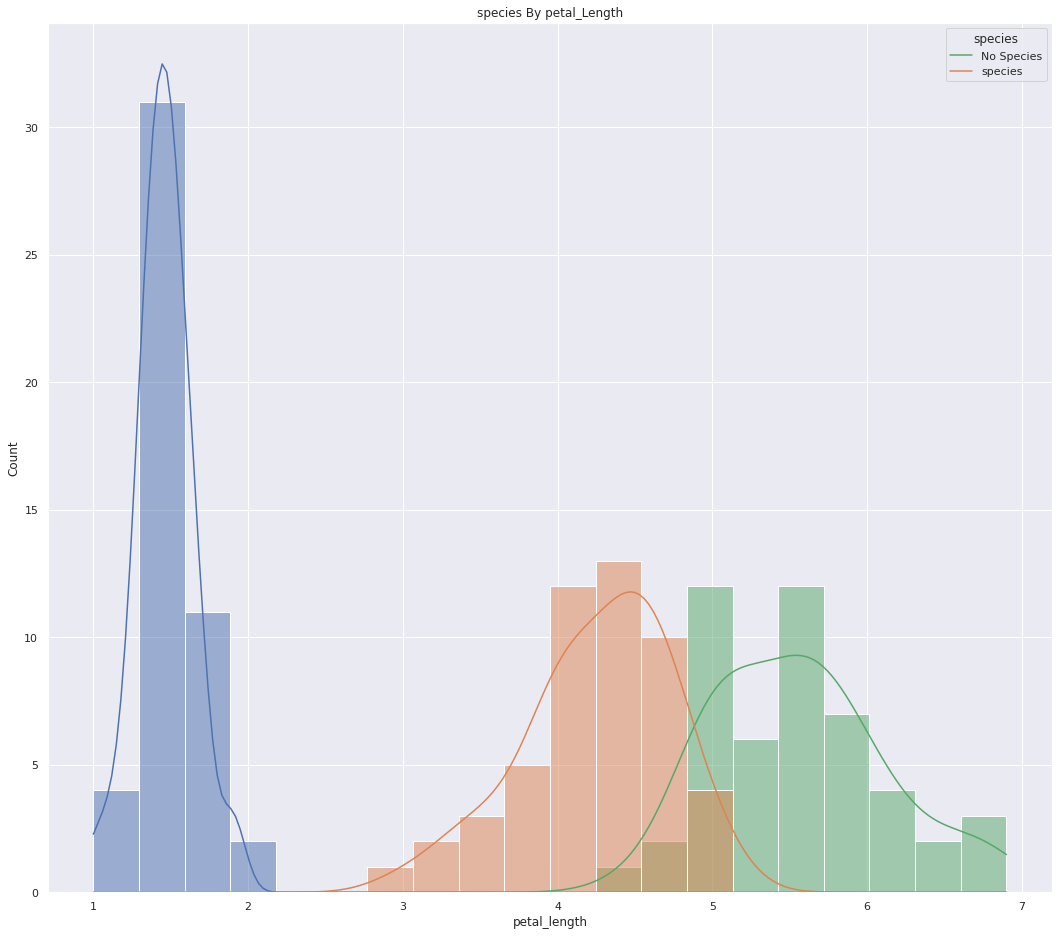

In [894]:
plt.figure(figsize=(18, 16))
sns.histplot(data=df, x="petal_length", hue='species', kde=True, bins=20)
plt.title('species By petal_Length')
plt.xlabel('petal_length')
plt.ylabel('Count')
plt.legend(title='species', loc='upper right', labels=['No Species', 'species'])
plt.show()

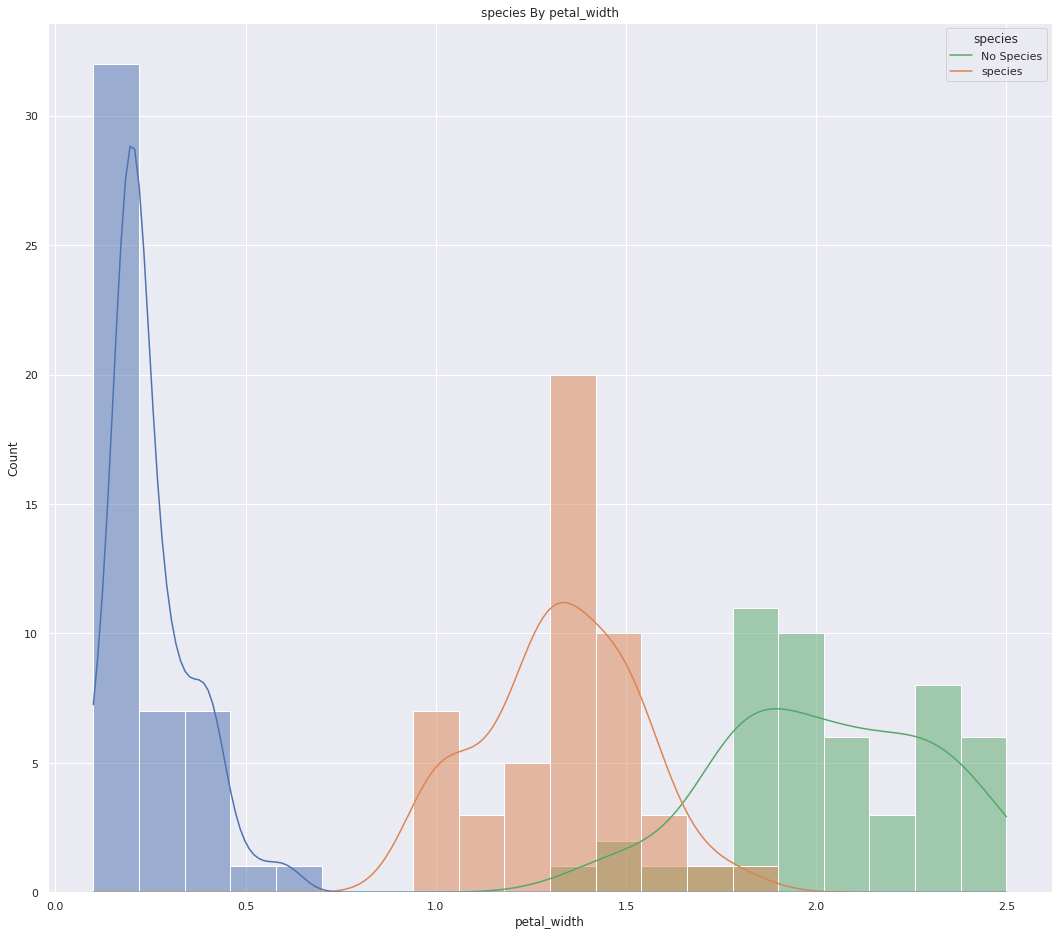

In [895]:
plt.figure(figsize=(18, 16))
sns.histplot(data=df, x="petal_width", hue='species', kde=True, bins=20)
plt.title('species By petal_width')
plt.xlabel('petal_width')
plt.ylabel('Count')
plt.legend(title='species', loc='upper right', labels=['No Species', 'species'])
plt.show()

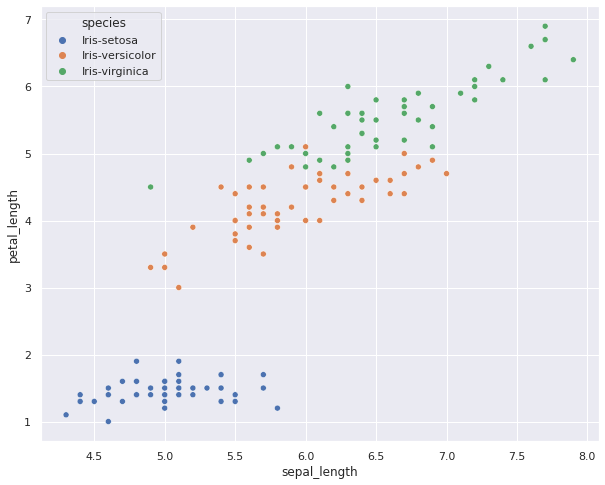

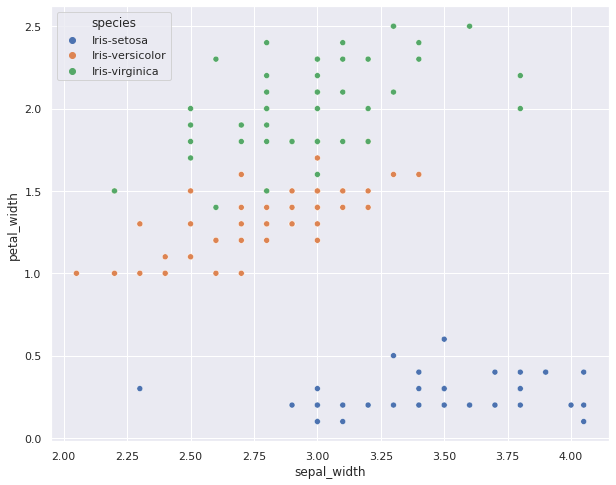

In [896]:
sns.scatterplot(x="sepal_length", y="petal_length", data=df, hue="species")
plt.show()

sns.scatterplot(x="sepal_width", y="petal_width", data=df, hue="species")
plt.show()

<ipython-input-897-1f8db7c938a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

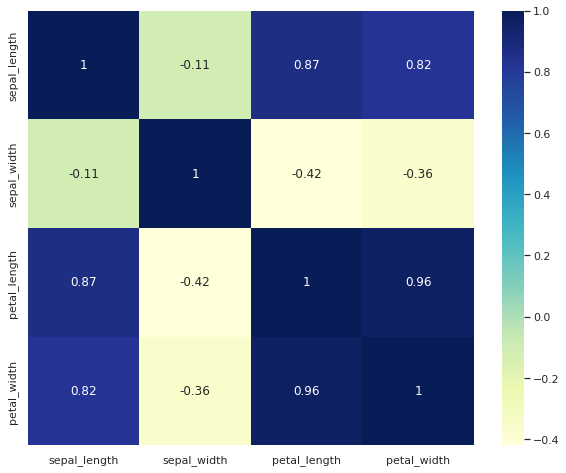

In [897]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

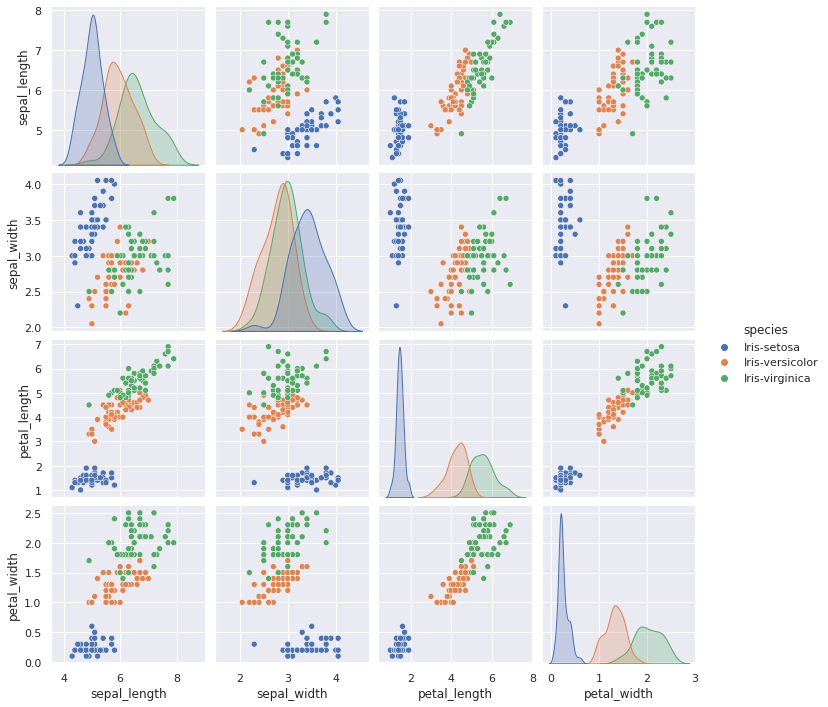

In [898]:
sns.pairplot(df, hue="species")
plt.show()

In [899]:
def plots(num_cols, variable):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)  # num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()

<ipython-input-899-290ff4d0be1f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)
<ipython-input-899-290ff4d0be1f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)
<ipython-input-899-290ff4d0be1f>:4: UserWarning: 

`di

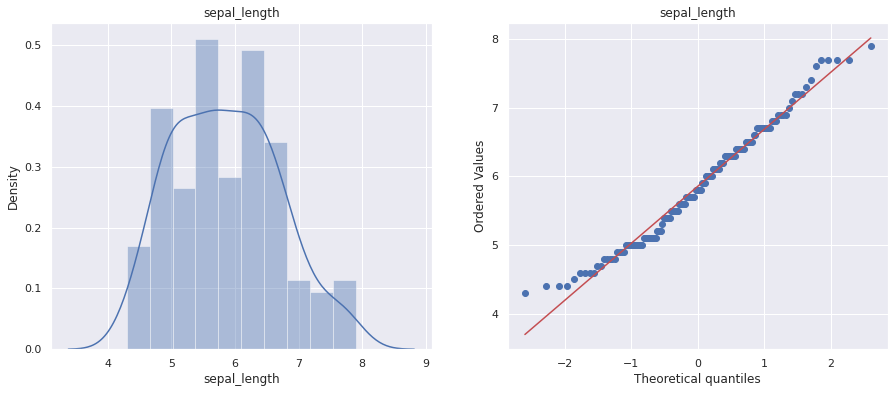

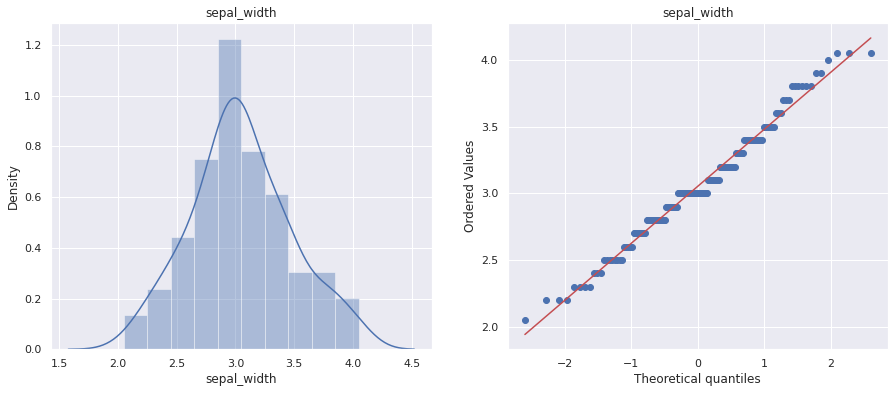

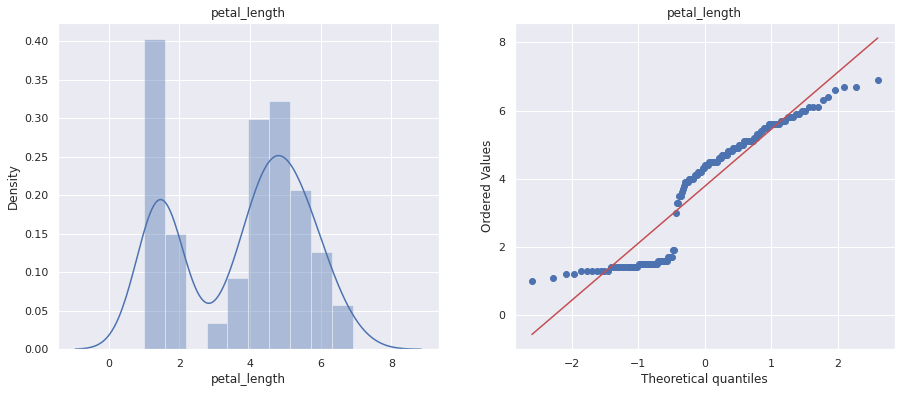

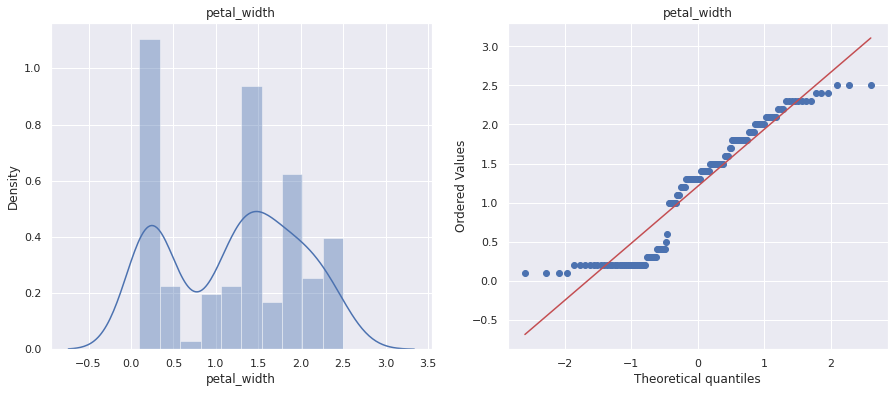

In [900]:
for i in num_cols.columns:
    plots(num_cols, i)

In [901]:
X = df.iloc[:,:4]
Y = df['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [902]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

sepal_width 0.260990
sepal_length 0.503662
petal_length 0.974220
petal_width 0.978843
dtype: float64

<Axes: >

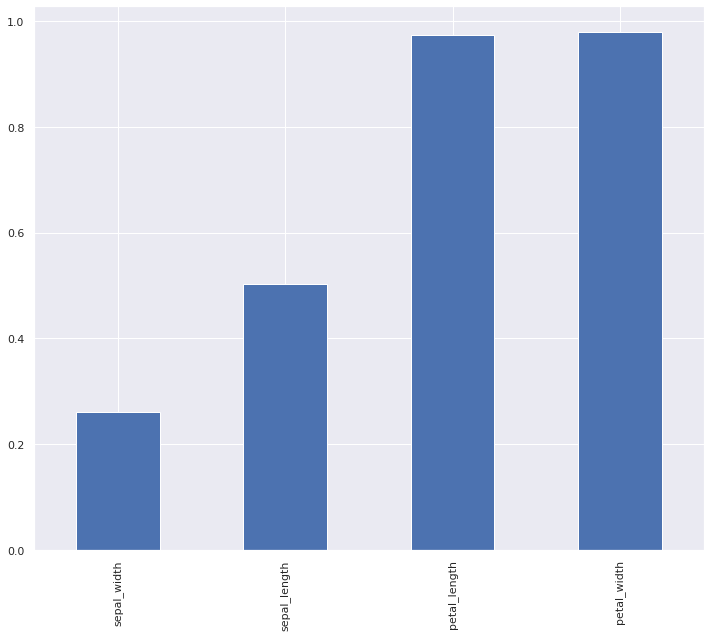

In [903]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(12,10))

In [904]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.2,random_state=0)
print("train_data :",train_data.shape)
print("train_label :",train_label.shape)
print("test_data :",test_data.shape)
print("test_label :",test_label.shape)

train_data : (117, 4)
train_label : (117,)
test_data : (30, 4)
test_label : (30,)


In [905]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [906]:
print(train_data_sc)

[[ 0.13678852 -0.33976781  0.38847688  0.37031498]
 [-0.22694459  1.78352895 -1.22247282 -1.23438326]
 [-1.56063265  0.36799778 -1.39507457 -1.36810811]
 [ 1.22798785  0.13207591  0.61861255  0.37031498]
 [-0.95441081  1.78352895 -1.28000674 -1.36810811]
 [-1.43938829  0.36799778 -1.45260849 -1.36810811]
 [ 0.98549911  0.13207591  0.33094296  0.23659012]
 [-0.5906777   1.54760709 -1.33754066 -1.36810811]
 [ 0.25803289 -1.0475334   1.02134998  0.23659012]
 [ 1.59172095  1.31168522  1.30901957  1.70756351]
 [ 0.01554415 -0.10384595  0.21587513  0.37031498]
 [ 1.10674348 -0.10384595  0.96381606  1.1726641 ]
 [ 0.25803289 -0.33976781  0.50354472  0.23659012]
 [ 0.86425474 -0.10384595  0.33094296  0.23659012]
 [ 1.59172095  0.36799778  1.25148565  0.77148954]
 [ 0.98549911  0.13207591  1.02134998  1.57383866]
 [ 0.74301037 -0.10384595  0.96381606  0.77148954]
 [-0.22694459 -0.57568967  0.15834121  0.10286527]
 [-0.22694459 -0.33976781  0.21587513  0.10286527]
 [ 0.13678852 -1.99122084  0.10

In [907]:
model_lr = LogisticRegression().fit(train_data_sc, train_label)

In [908]:
y_pred_1 = model_lr.predict(test_data_sc)
print(y_pred_1)

accuracy_score(y_pred_1,test_label)

confusion_matrix(y_pred_1,test_label)

confusion_matrix(y_pred_1,test_label)

confusion_matrix(y_pred_1,test_label)

print(classification_report(y_pred_1,test_label))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [909]:
model_rf = RandomForestClassifier().fit(train_data_sc,train_label)

y_pred_2 = model_rf.predict(test_data_sc)

In [910]:
print("Train Data Accuracy :",(model_rf.score(train_data_sc,train_label)))
print("Test Data Accuracy :",(accuracy_score(y_pred_2,test_label)))

Train Data Accuracy : 1.0
Test Data Accuracy : 0.9666666666666667


In [911]:
confusion_matrix(y_pred_2,test_label)

print(classification_report(y_pred_2,test_label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [912]:
model_knn = KNeighborsClassifier(n_neighbors=3).fit(train_data_sc,train_label)

In [913]:
y_pred_3 = model_knn.predict(test_data_sc)

print("Test Data Accuracy :",(accuracy_score(y_pred_3,test_label)))

confusion_matrix(y_pred_3,test_label)

print(classification_report(y_pred_3,test_label))

Test Data Accuracy : 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Sheet 2

In [914]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [915]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [916]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [917]:
df.shape

(1000, 8)

In [918]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [919]:
df.dtypes

gender object
race/ethnicity object
parental level of education object
lunch object
test preparation course object
math score int64
reading score int64
writing score int64
dtype: object

In [920]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [921]:
df.nunique()

gender 2
race/ethnicity 5
parental level of education 6
lunch 2
test preparation course 2
math score 81
reading score 72
writing score 77
dtype: int64

In [922]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [923]:
df['gender'].value_counts()

female 518
male 482
Name: gender, dtype: int64

In [924]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [925]:
df.isnull().sum()

gender 0
race/ethnicity 0
parental level of education 0
lunch 0
test preparation course 0
math score 0
reading score 0
writing score 0
dtype: int64

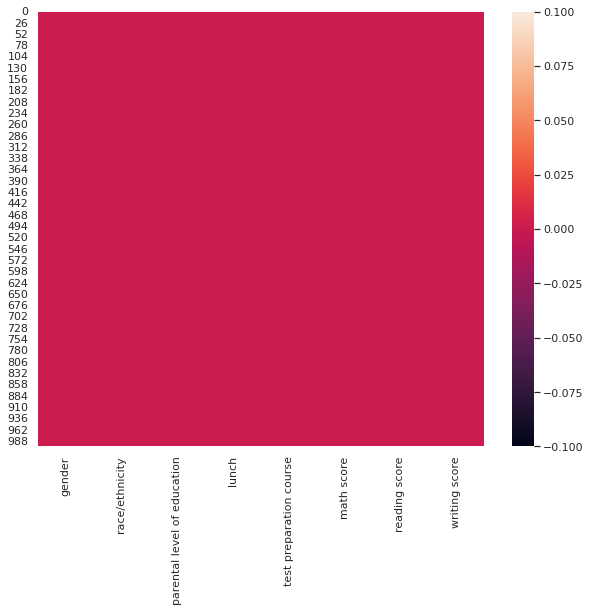

In [926]:
sns.heatmap(df.isnull())
plt.show()

In [927]:
preparation = (len(df[df['test preparation course'] == 'completed']) / len(df)) * 100
preparation

35.8

In [928]:
average_score = df['math score'].mean()
average_score

66.089

<Axes: >

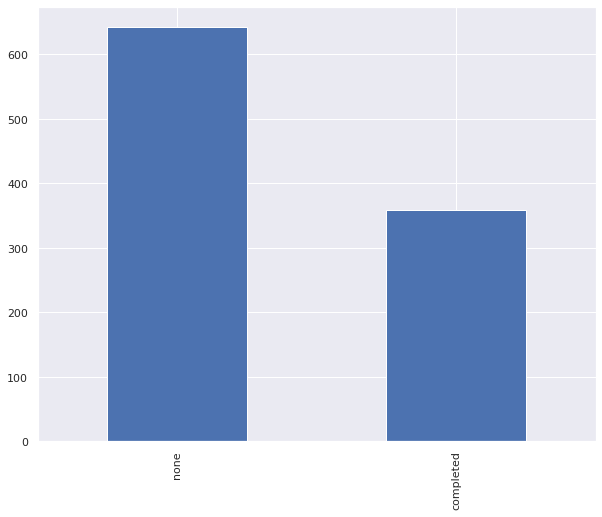

In [929]:
df['test preparation course'].value_counts().plot(kind = 'bar')

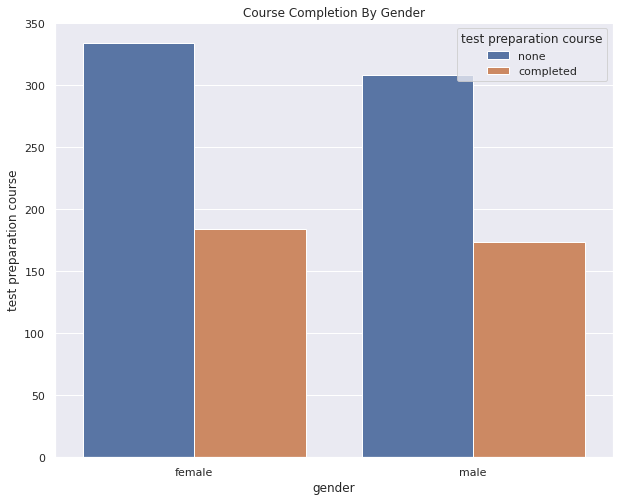

In [930]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='gender', hue ='test preparation course')
plt.xlabel('gender')
plt.ylabel('test preparation course')
plt.title('Course Completion By Gender')
plt.show()

<Axes: >

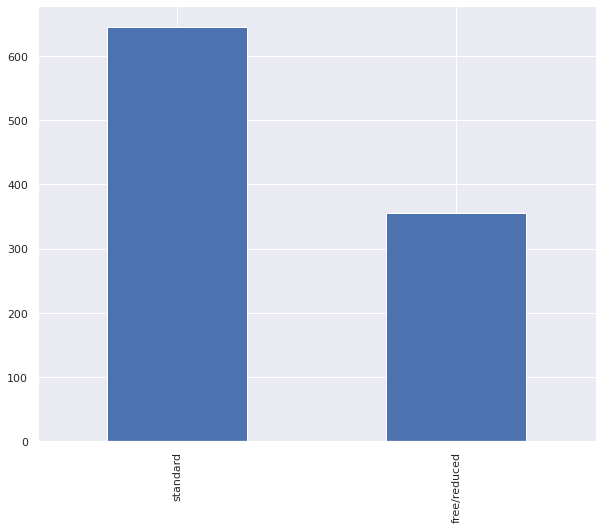

In [931]:
df['lunch'].value_counts().plot(kind = 'bar')

In [932]:
df['lunch'].value_counts()

standard 645
free/reduced 355
Name: lunch, dtype: int64

<Axes: xlabel='lunch,gender'>

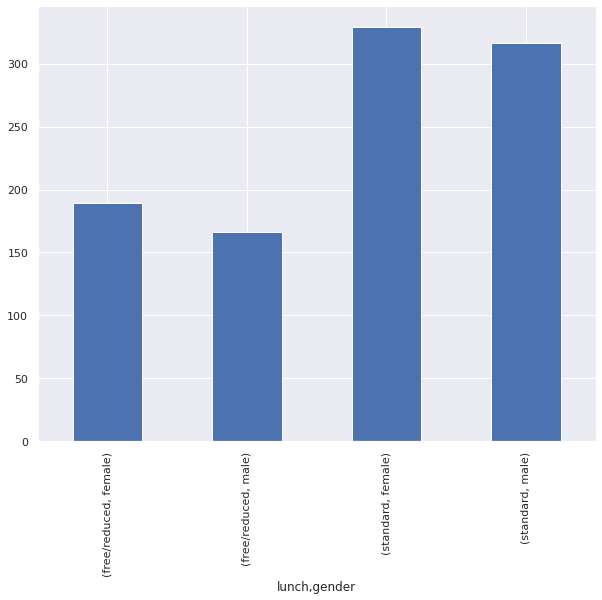

In [933]:
lunch_avg_gender = df.groupby('lunch')['gender'].value_counts().plot(kind = 'bar')
lunch_avg_gender

In [934]:
gender_avg_score = df.groupby('gender')['reading score'].mean()
gender_avg_score

gender
female 72.608108
male 65.473029
Name: reading score, dtype: float64

<Axes: >

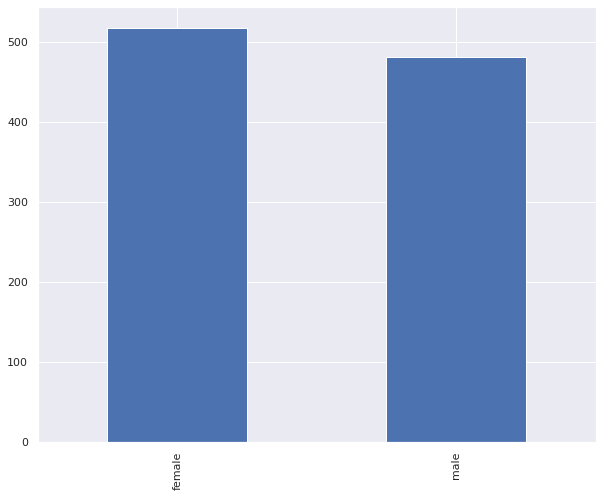

In [935]:
df.gender.value_counts().plot(kind = 'bar')

In [936]:
level_edu = df['parental level of education'].value_counts()
level_edu

some college 226
associate's degree 222
high school 196
some high school 179
bachelor's degree 118
master's degree 59
Name: parental level of education, dtype: int64

# Sheet 3

In [937]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif
from sklearn.model_selection import  train_test_split,cross_val_score

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [938]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [939]:
df.shape

(7043, 21)

In [940]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [941]:
df.isnull().sum()

customerID 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 0
Churn 0
dtype: int64

In [942]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


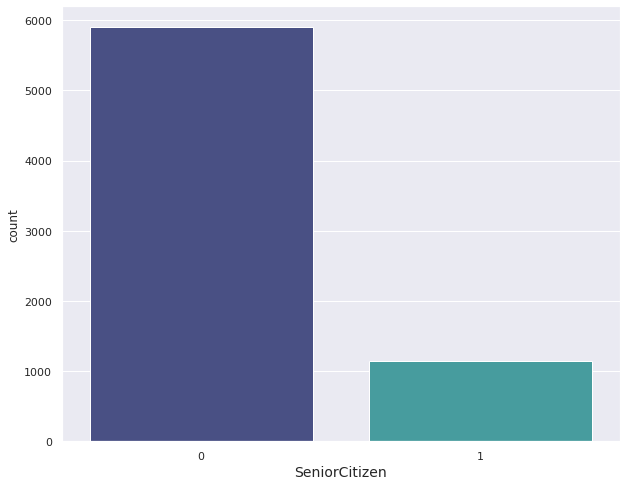

In [944]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'SeniorCitizen', data = df , palette = 'mako')
plt.xlabel('SeniorCitizen', fontsize= 14)
plt.show()

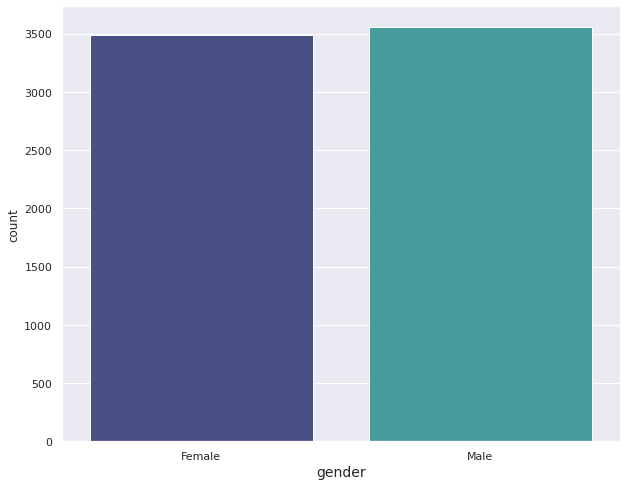

In [945]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'gender', data = df , palette = 'mako')
plt.xlabel('gender', fontsize= 14)
plt.show()

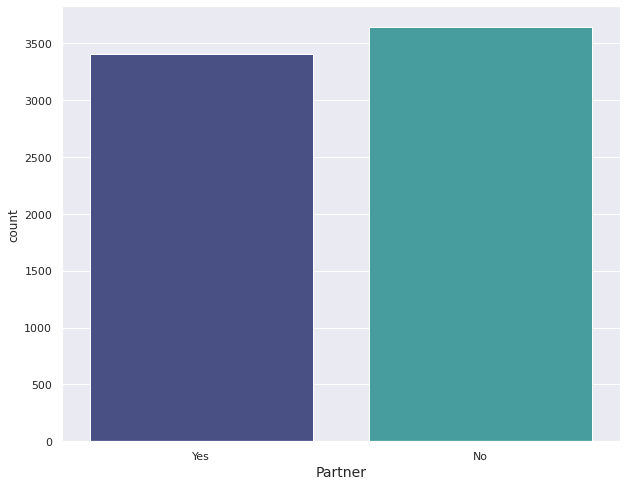

In [946]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Partner', data = df , palette = 'mako')
plt.xlabel('Partner', fontsize= 14)
plt.show()

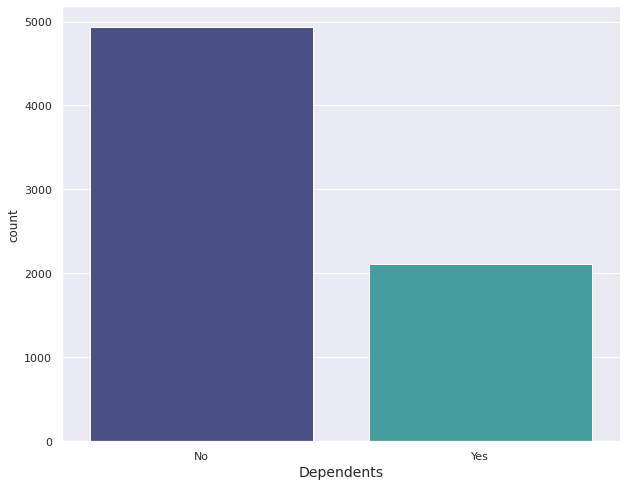

In [947]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Dependents', data = df , palette = 'mako')
plt.xlabel('Dependents', fontsize= 14)
plt.show()

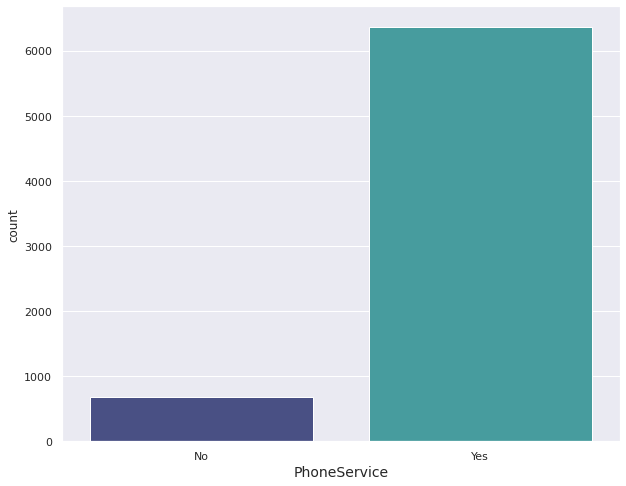

In [948]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'PhoneService', data = df , palette = 'mako')
plt.xlabel('PhoneService', fontsize= 14)
plt.show()

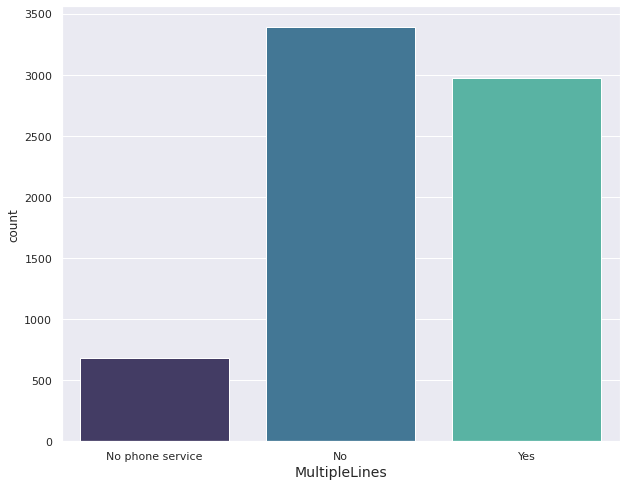

In [949]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'MultipleLines', data = df , palette = 'mako')
plt.xlabel('MultipleLines', fontsize= 14)
plt.show()

In [950]:
df["MultipleLines"].value_counts()

No 3390
Yes 2971
No phone service 682
Name: MultipleLines, dtype: int64

In [951]:
df['MultipleLines'].replace("No phonw service", "No", inplace = True)

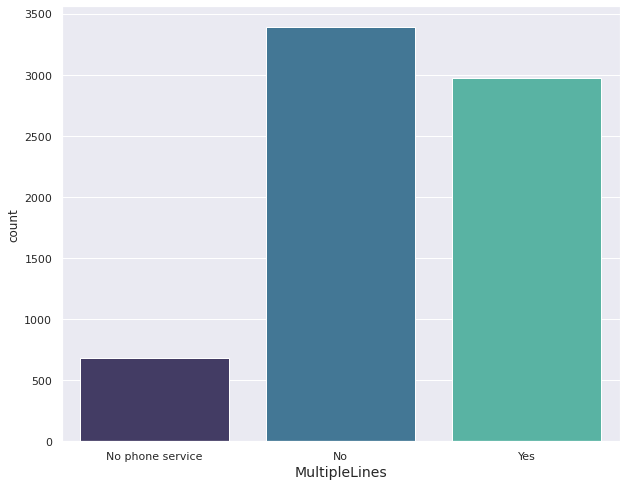

In [952]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'MultipleLines', data = df , palette = 'mako')
plt.xlabel('MultipleLines', fontsize= 14)
plt.show()

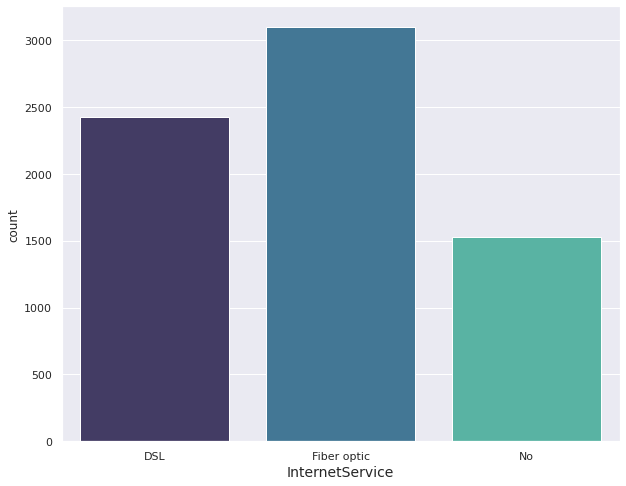

In [953]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'InternetService', data = df , palette = 'mako')
plt.xlabel('InternetService', fontsize= 14)
plt.show()

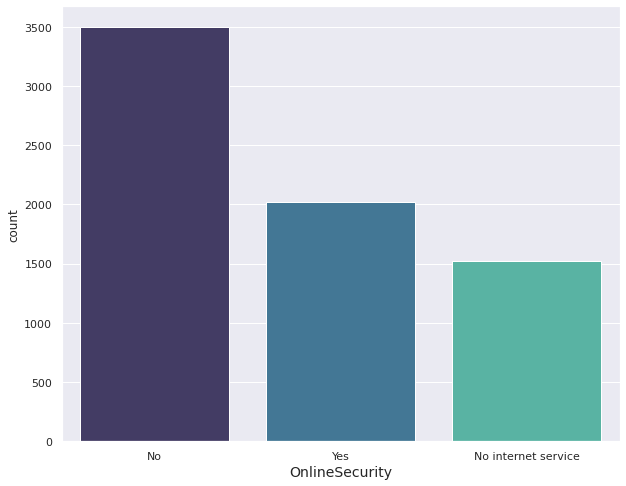

In [954]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'OnlineSecurity', data = df , palette = 'mako')
plt.xlabel('OnlineSecurity', fontsize= 14)
plt.show()

In [955]:
df["OnlineSecurity"].replace("No Internet Service ","No", inplace = True)

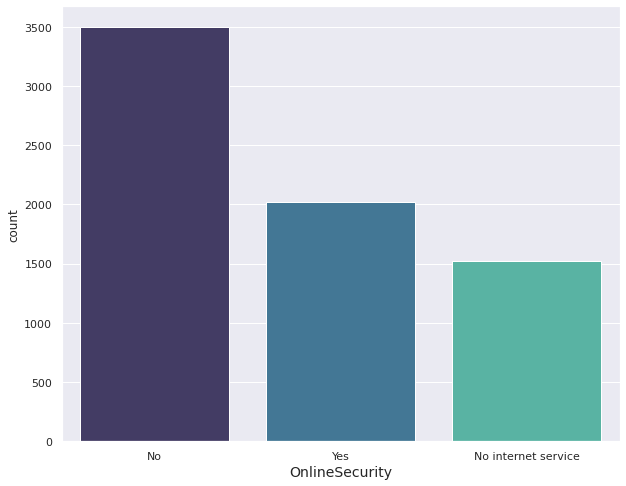

In [956]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'OnlineSecurity', data = df , palette = 'mako')
plt.xlabel('OnlineSecurity', fontsize= 14)
plt.show()

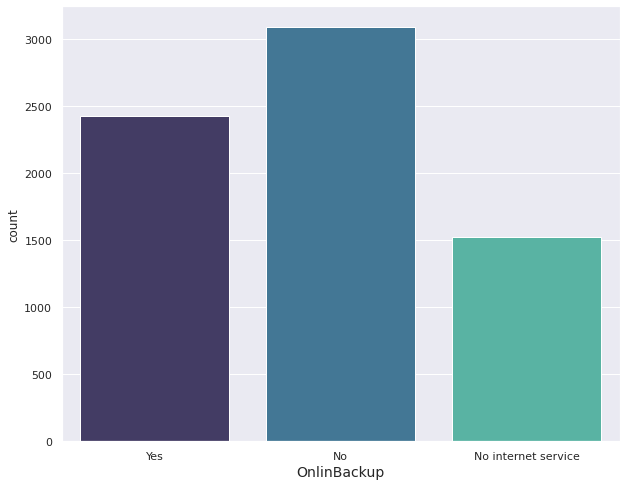

In [957]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'OnlineBackup', data = df , palette = 'mako')
plt.xlabel('OnlinBackup', fontsize= 14)
plt.show()

In [958]:
df["OnlineBackup"].replace("No Internet Service ","No", inplace = True)

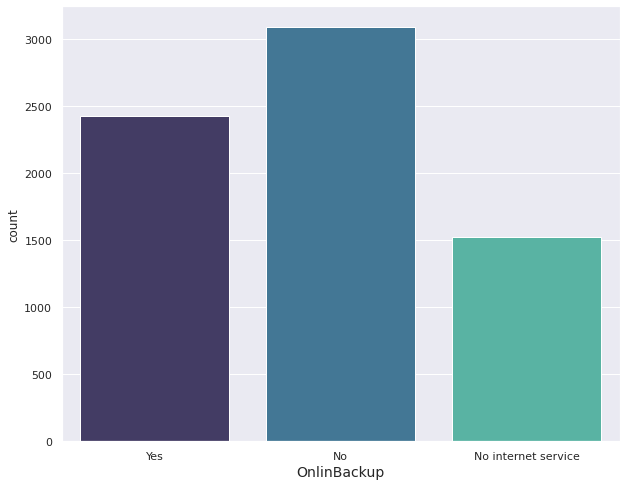

In [959]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'OnlineBackup', data = df , palette = 'mako')
plt.xlabel('OnlinBackup', fontsize= 14)
plt.show()

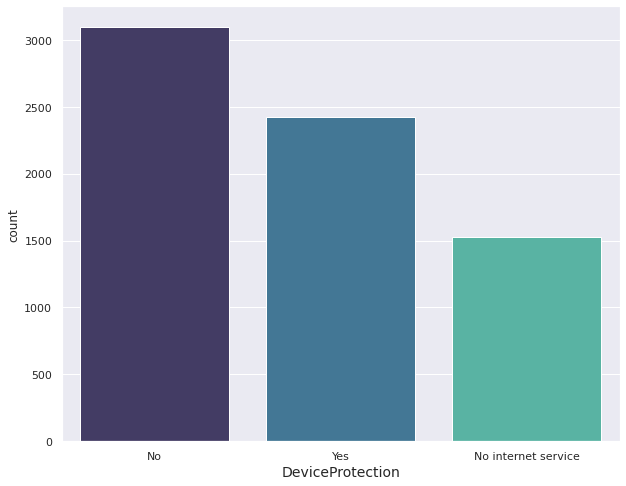

In [960]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'DeviceProtection', data = df , palette = 'mako')
plt.xlabel('DeviceProtection', fontsize= 14)
plt.show()

In [961]:
df["DeviceProtection"].replace("No Internet Service ","No", inplace = True)

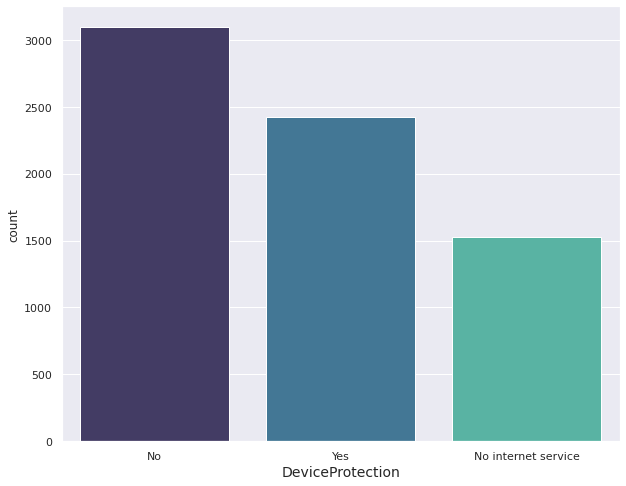

In [962]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'DeviceProtection', data = df , palette = 'mako')
plt.xlabel('DeviceProtection', fontsize= 14)
plt.show()

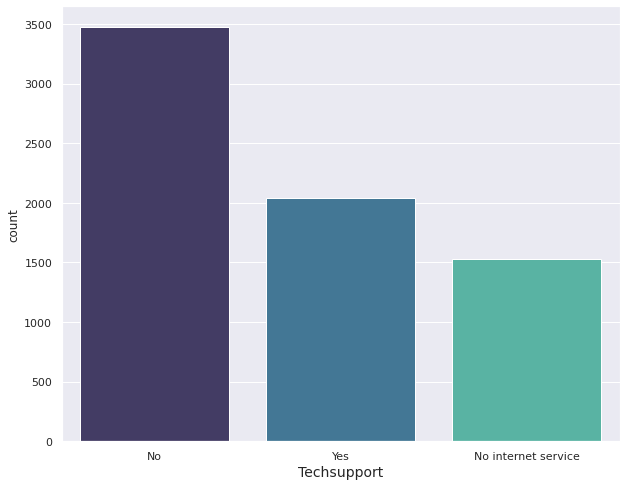

In [963]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'TechSupport', data = df , palette = 'mako')
plt.xlabel('Techsupport', fontsize= 14)
plt.show()

In [964]:
df["TechSupport"].replace("No Internet Service ","No", inplace = True)

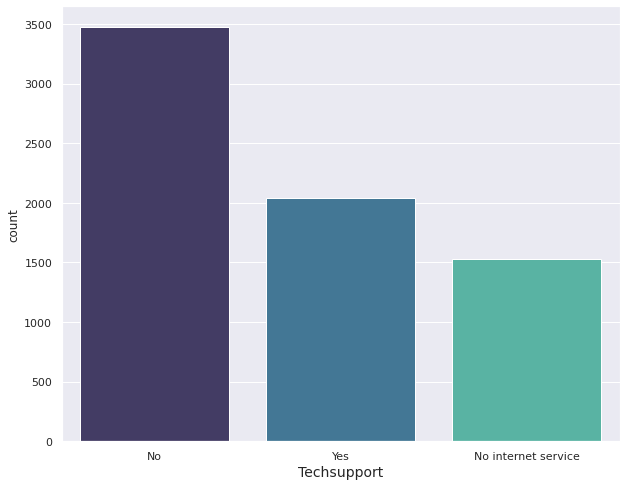

In [965]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'TechSupport', data = df , palette = 'mako')
plt.xlabel('Techsupport', fontsize= 14)
plt.show()

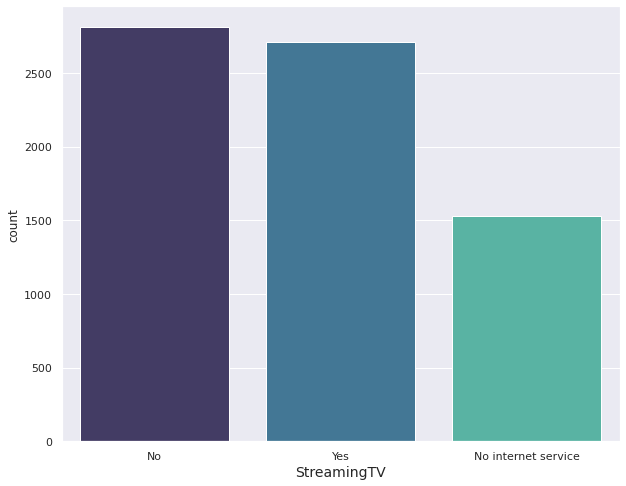

In [966]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'StreamingTV', data = df , palette = 'mako')
plt.xlabel('StreamingTV', fontsize= 14)
plt.show()

In [967]:
df["StreamingTV"].replace("No Internet Service ","No", inplace = True)

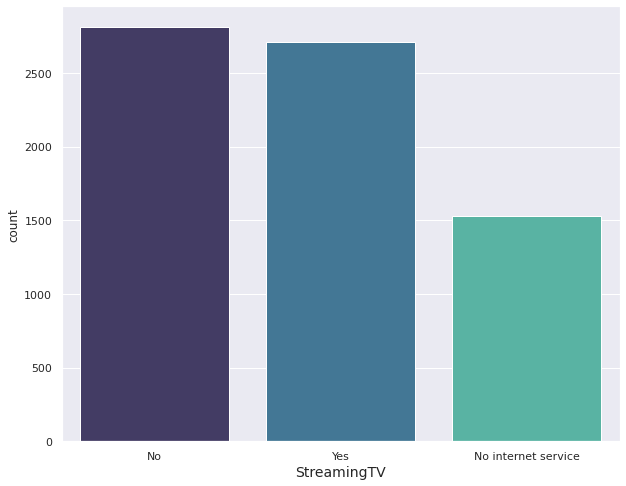

In [968]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'StreamingTV', data = df , palette = 'mako')
plt.xlabel('StreamingTV', fontsize= 14)
plt.show()

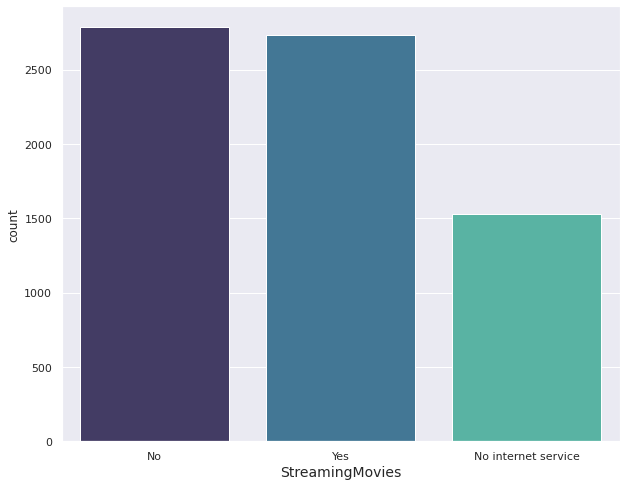

In [969]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'StreamingMovies', data = df , palette = 'mako')
plt.xlabel('StreamingMovies', fontsize= 14)
plt.show()

In [970]:
df["StreamingMovies"].replace("No Internet Service ","No", inplace = True)

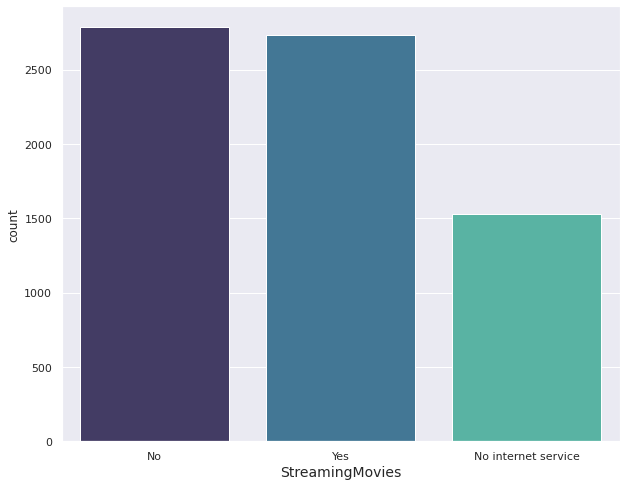

In [971]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'StreamingMovies', data = df , palette = 'mako')
plt.xlabel('StreamingMovies', fontsize= 14)
plt.show()

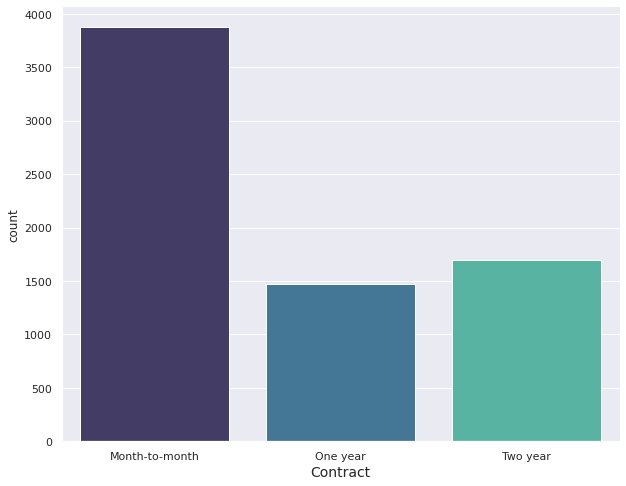

In [972]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Contract', data = df , palette = 'mako')
plt.xlabel('Contract', fontsize= 14)
plt.show()

In [973]:
df["Contract"].replace("No Internet Service ","No", inplace = True)

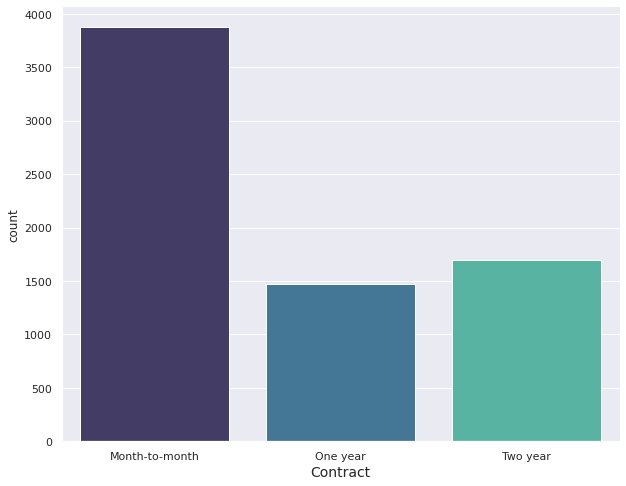

In [974]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Contract', data = df , palette = 'mako')
plt.xlabel('Contract', fontsize= 14)
plt.show()

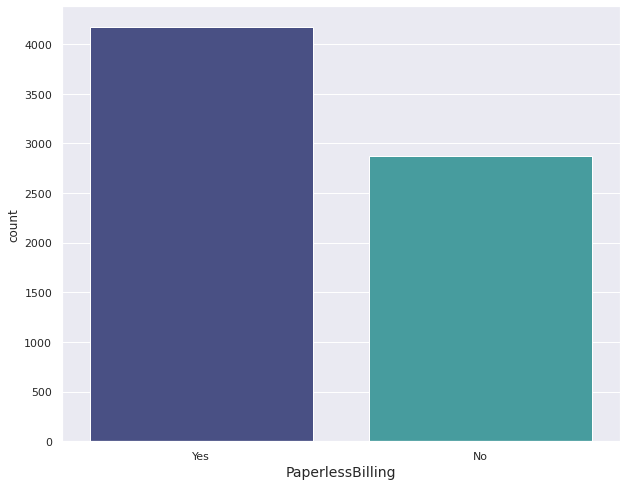

In [975]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'PaperlessBilling', data = df , palette = 'mako')
plt.xlabel('PaperlessBilling', fontsize= 14)
plt.show()

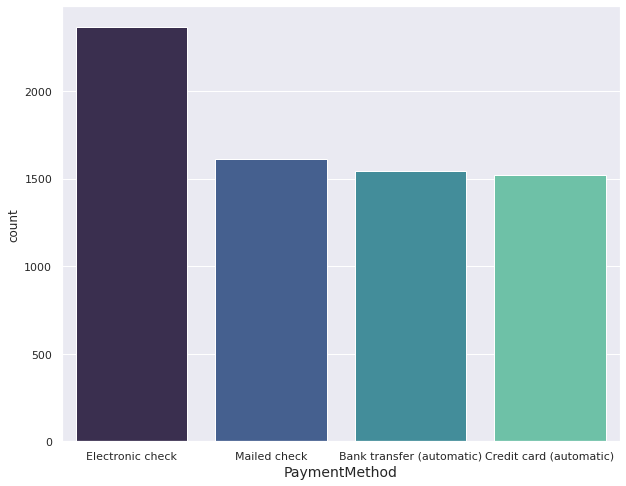

In [976]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'PaymentMethod', data = df , palette = 'mako')
plt.xlabel('PaymentMethod', fontsize= 14)
plt.show()

In [977]:
df["TotalCharges"].value_counts()

11
20.2 11
19.75 9
20.05 8
19.9 8
 ..
6849.4 1
692.35 1
130.15 1
3211.9 1
6844.5 1
Name: TotalCharges, Length: 6531, dtype: int64

In [978]:
df["TotalCharges"].replace(" ",np.nan, inplace = True)

In [979]:
df["TotalCharges"].value_counts()

20.2 11
19.75 9
20.05 8
19.9 8
19.65 8
 ..
6849.4 1
692.35 1
130.15 1
3211.9 1
6844.5 1
Name: TotalCharges, Length: 6530, dtype: int64

In [980]:
df["TotalCharges"] = df["TotalCharges"].astype("float64")

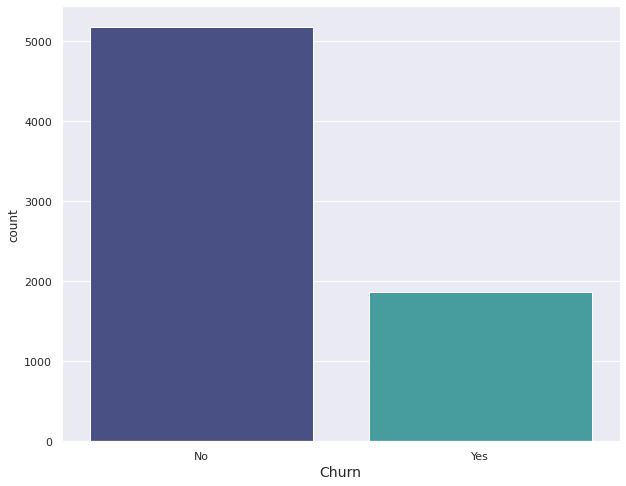

In [981]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Churn', data = df , palette = 'mako')
plt.xlabel('Churn', fontsize= 14)
plt.show()

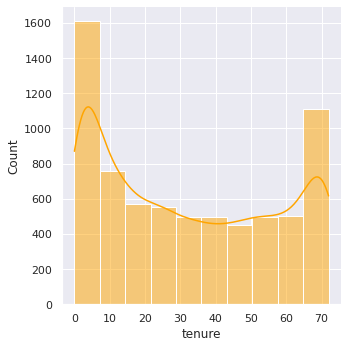

In [982]:
sns.set(rc={"figure.figsize": (8,6)})
sns.displot(df["tenure"], kde=True, color="orange", bins=10)

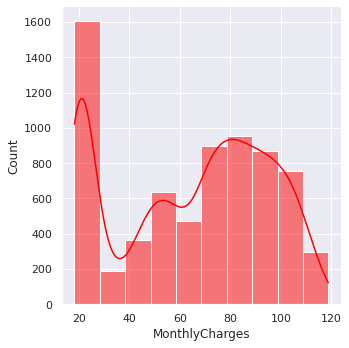

In [983]:
sns.set(rc={"figure.figsize": (8,6)})
sns.displot(df["MonthlyCharges"], kde=True, color="red", bins=10)

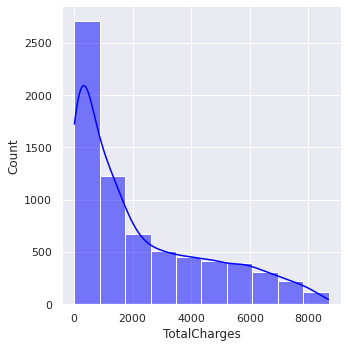

In [984]:
sns.set(rc={"figure.figsize": (8,6)})
sns.displot(df["TotalCharges"], kde=True, color="blue", bins=10)

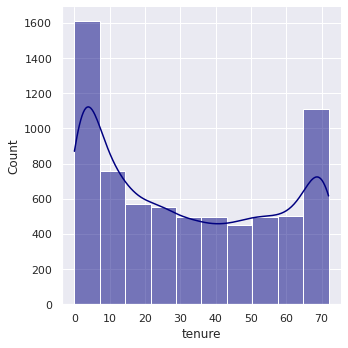

In [985]:
sns.set(rc={"figure.figsize": (8,6)})
sns.displot(df["tenure"], kde=True, color="navy", bins=10)

In [986]:
df.isnull().sum()

customerID 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 11
Churn 0
dtype: int64

In [987]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [988]:
df.isnull().sum()

customerID 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 0
Churn 0
dtype: int64

In [989]:
duplicate = df.duplicated()
print(duplicate.sum())

0


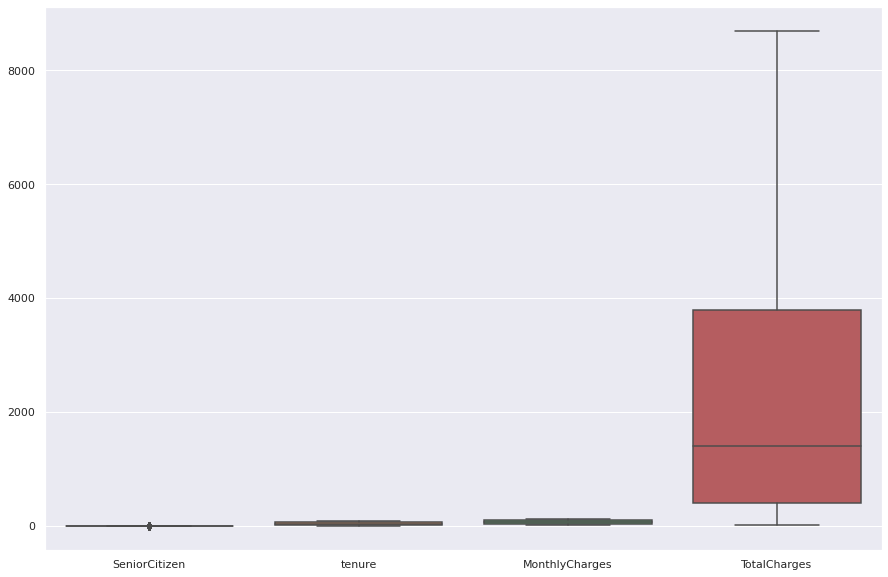

In [990]:
num_cols = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,10))
sns.boxplot(data=num_cols)
plt.show()

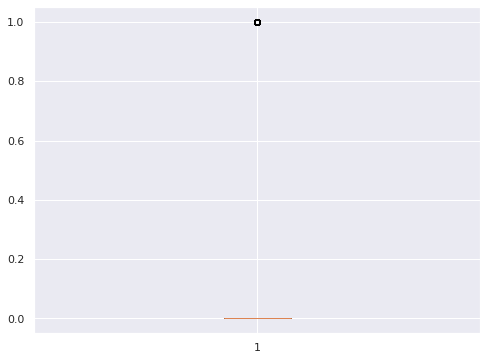

In [991]:
plt.boxplot(df['SeniorCitizen'])
plt.show()

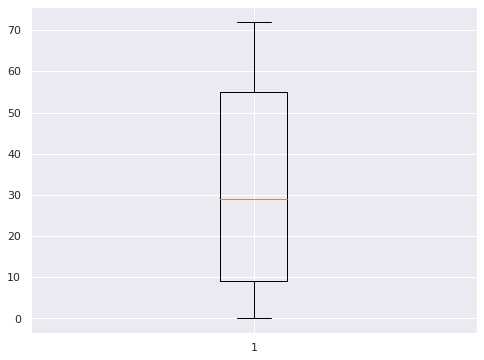

In [992]:
plt.boxplot(df['tenure'])
plt.show()

In [993]:
df["SeniorCitizen"].value_counts()

0 5901
1 1142
Name: SeniorCitizen, dtype: int64

In [994]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

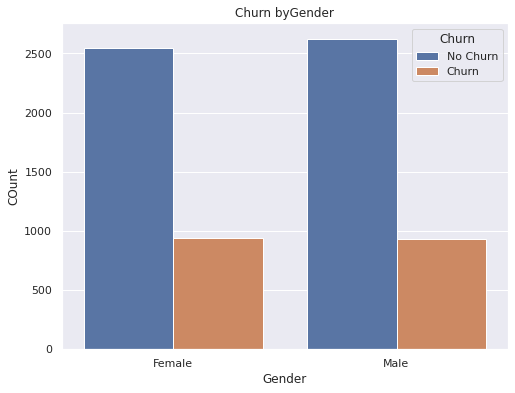

In [995]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn byGender")
plt.xlabel("Gender")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

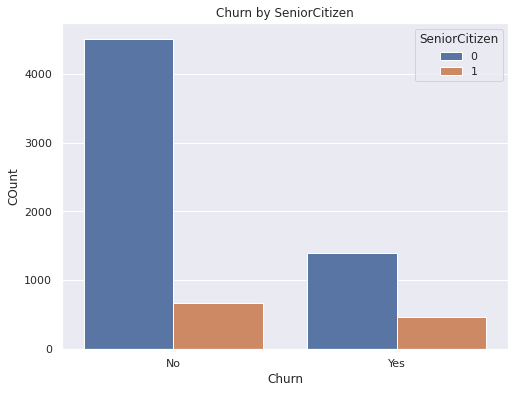

In [996]:
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)
plt.title("Churn by SeniorCitizen")
plt.xlabel("Churn")
plt.ylabel("COunt")
plt.show()

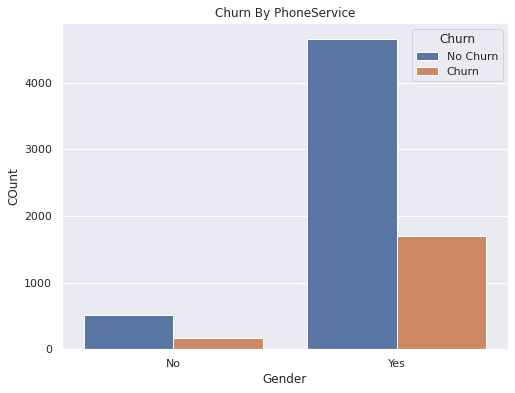

In [997]:
plt.figure(figsize=(8,6))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title("Churn By PhoneService")
plt.xlabel("Gender")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

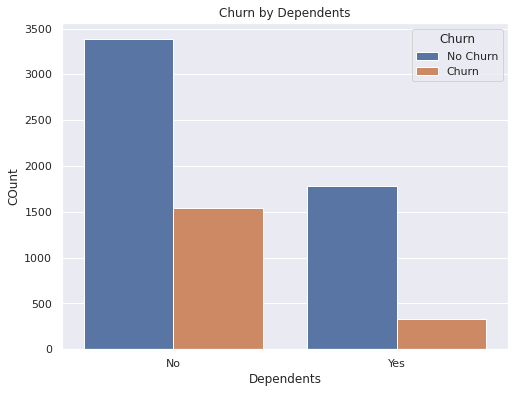

In [998]:
plt.figure(figsize=(8,6))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title("Churn by Dependents")
plt.xlabel("Dependents")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

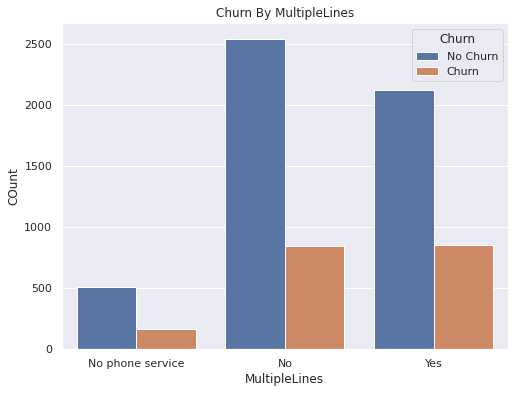

In [999]:
plt.figure(figsize=(8,6))
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title("Churn By MultipleLines")
plt.xlabel("MultipleLines")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

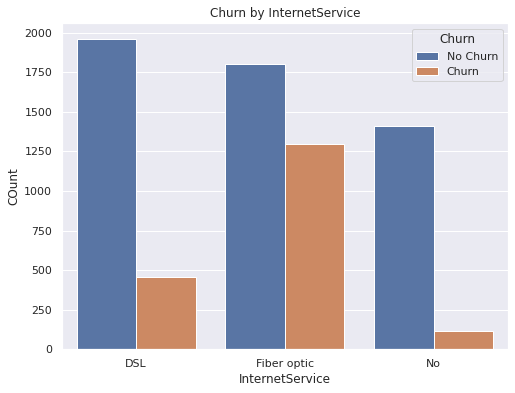

In [1000]:
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by InternetService")
plt.xlabel("InternetService")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

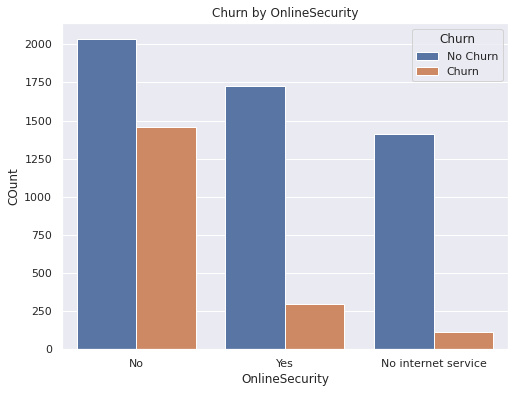

In [1001]:
plt.figure(figsize=(8,6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title("Churn by OnlineSecurity")
plt.xlabel("OnlineSecurity")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

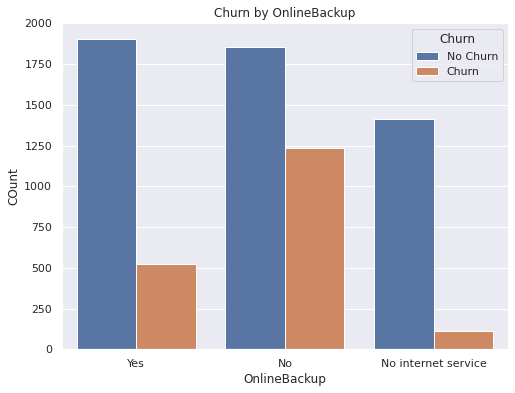

In [1002]:
plt.figure(figsize=(8,6))
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title("Churn by OnlineBackup")
plt.xlabel("OnlineBackup")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

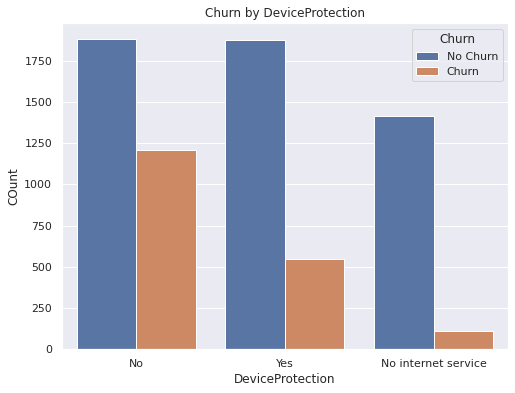

In [1003]:
plt.figure(figsize=(8,6))
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title("Churn by DeviceProtection")
plt.xlabel("DeviceProtection")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

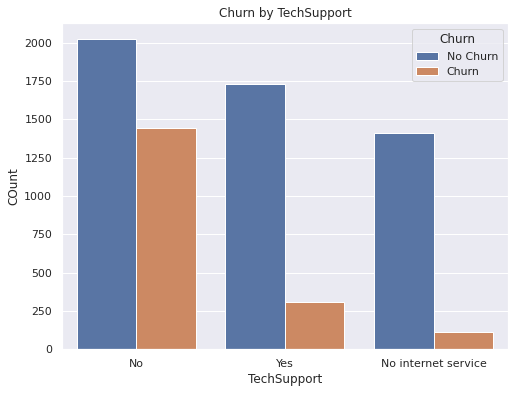

In [1004]:
plt.figure(figsize=(8,6))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Churn by TechSupport")
plt.xlabel("TechSupport")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

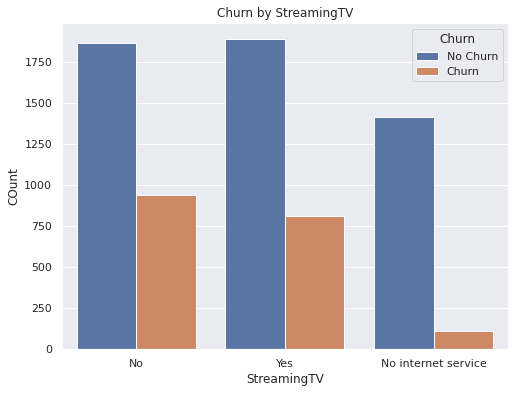

In [1005]:
plt.figure(figsize=(8,6))
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title("Churn by StreamingTV")
plt.xlabel("StreamingTV")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

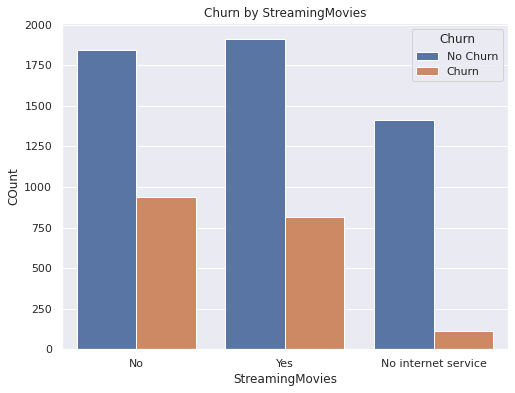

In [1006]:
plt.figure(figsize=(8,6))
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title("Churn by StreamingMovies")
plt.xlabel("StreamingMovies")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

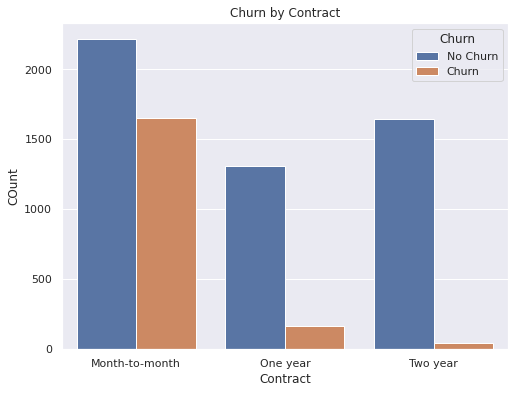

In [1007]:
plt.figure(figsize=(8,6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract")
plt.xlabel("Contract")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

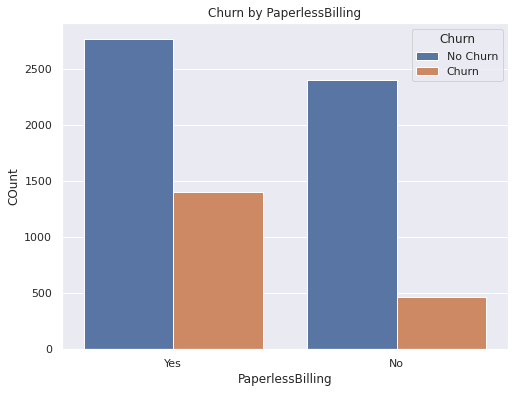

In [1008]:
plt.figure(figsize=(8,6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title("Churn by PaperlessBilling")
plt.xlabel("PaperlessBilling")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

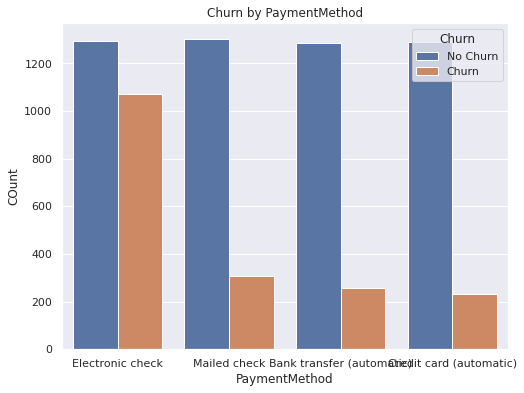

In [1009]:
plt.figure(figsize=(8,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

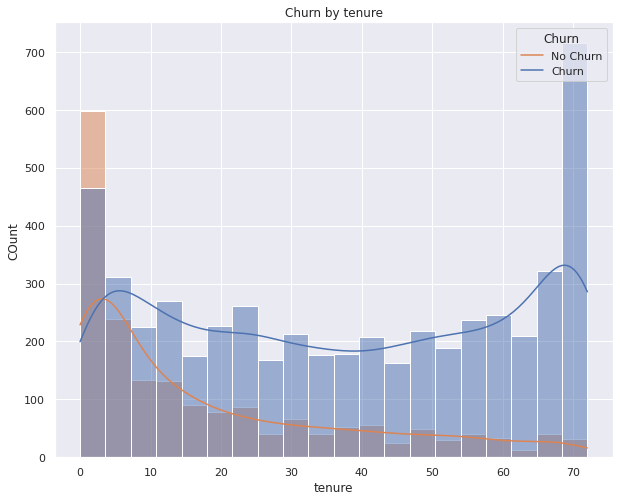

In [1010]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='tenure', hue='Churn', kde=True, bins=20)
plt.title("Churn by tenure")
plt.xlabel("tenure")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

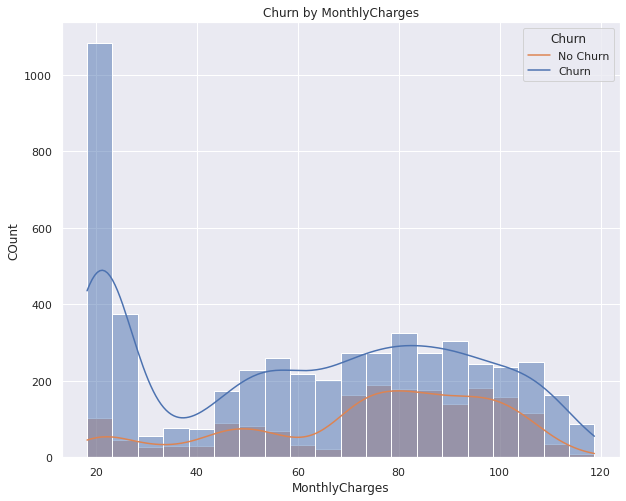

In [1011]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='MonthlyCharges', hue='Churn', kde =True ,bins=20)
plt.title("Churn by MonthlyCharges")
plt.xlabel("MonthlyCharges")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

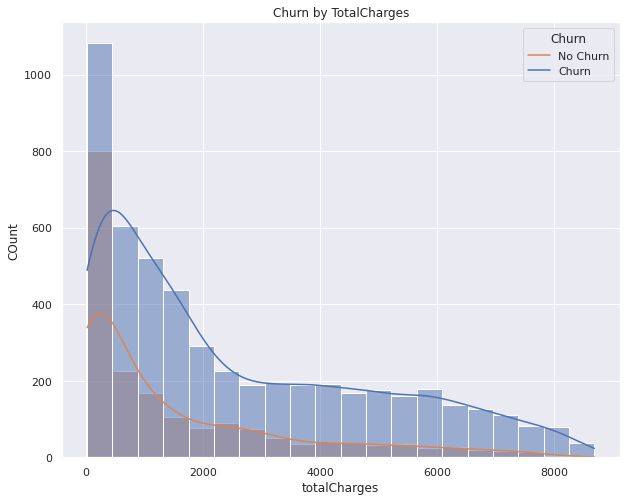

In [1012]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True,bins=20)
plt.title("Churn by TotalCharges")
plt.xlabel("totalCharges")
plt.ylabel("COunt")
plt.legend(title = "Churn",loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

In [1013]:
le = LabelEncoder()
Label = df.select_dtypes(include=['object'])
df1 = df.copy()

for  i in Label:
    df1[i] = le.fit_transform(df1[i])

df1.shape

(7043, 21)

In [1014]:
df1.dtypes

customerID int64
gender int64
SeniorCitizen int64
Partner int64
Dependents int64
tenure int64
PhoneService int64
MultipleLines int64
InternetService int64
OnlineSecurity int64
OnlineBackup int64
DeviceProtection int64
TechSupport int64
StreamingTV int64
StreamingMovies int64
Contract int64
PaperlessBilling int64
PaymentMethod int64
MonthlyCharges float64
TotalCharges float64
Churn int64
dtype: object

In [1015]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [1016]:
X = df1.iloc[:,1:20]
Y = df1.iloc[:,-1]

In [1017]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [1018]:
mi_score1 = mutual_info_classif(X,Y)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X.columns
mi_score1.sort_values(ascending=True)

PhoneService 0.000000
gender 0.001911
MultipleLines 0.004688
SeniorCitizen 0.010125
Partner 0.015740
Dependents 0.016075
StreamingTV 0.019046
PaperlessBilling 0.019138
StreamingMovies 0.028691
PaymentMethod 0.039660
TotalCharges 0.043972
MonthlyCharges 0.045154
DeviceProtection 0.047583
OnlineBackup 0.049679
InternetService 0.052365
TechSupport 0.070987
OnlineSecurity 0.072811
tenure 0.078040
Contract 0.093694
dtype: float64

<Axes: >

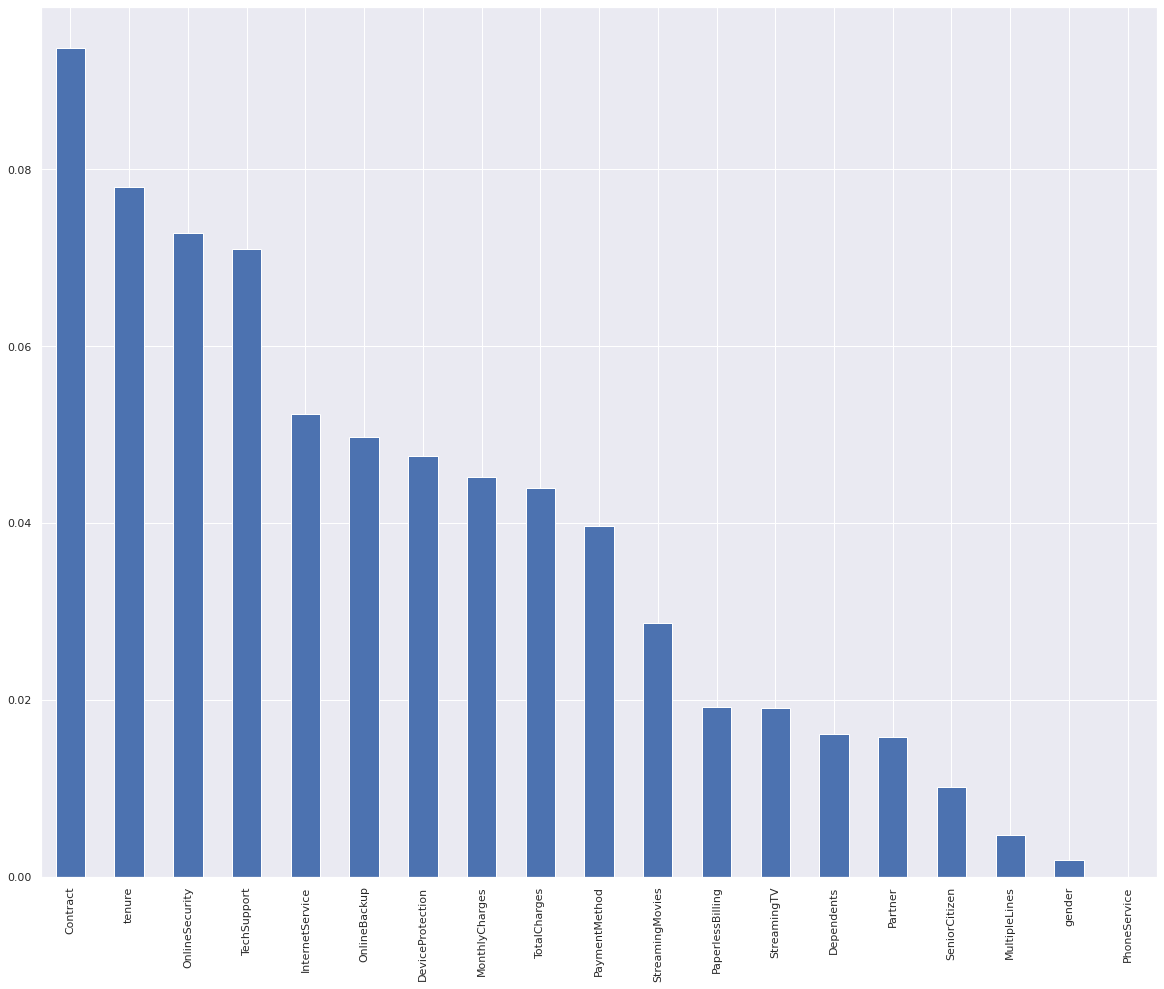

In [1019]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20,16))

In [1020]:
X["Usage_Bill_Ratio"] = X["MonthlyCharges"] / X["TotalCharges"]

In [1021]:
mi_score1 = mutual_info_classif(X,Y)
mi_score1 = pd.Series(mi_score1)
mi_score1.index = X.columns
mi_score1.sort_values(ascending=True)

PhoneService 0.000000
gender 0.001455
MultipleLines 0.001610
SeniorCitizen 0.006131
PaperlessBilling 0.010820
Dependents 0.011548
Partner 0.015799
StreamingMovies 0.031197
StreamingTV 0.031608
TotalCharges 0.044009
PaymentMethod 0.045434
DeviceProtection 0.046117
MonthlyCharges 0.047005
InternetService 0.050973
OnlineBackup 0.051124
OnlineSecurity 0.060660
TechSupport 0.062567
tenure 0.072959
Usage_Bill_Ratio 0.080828
Contract 0.097656
dtype: float64

<Axes: >

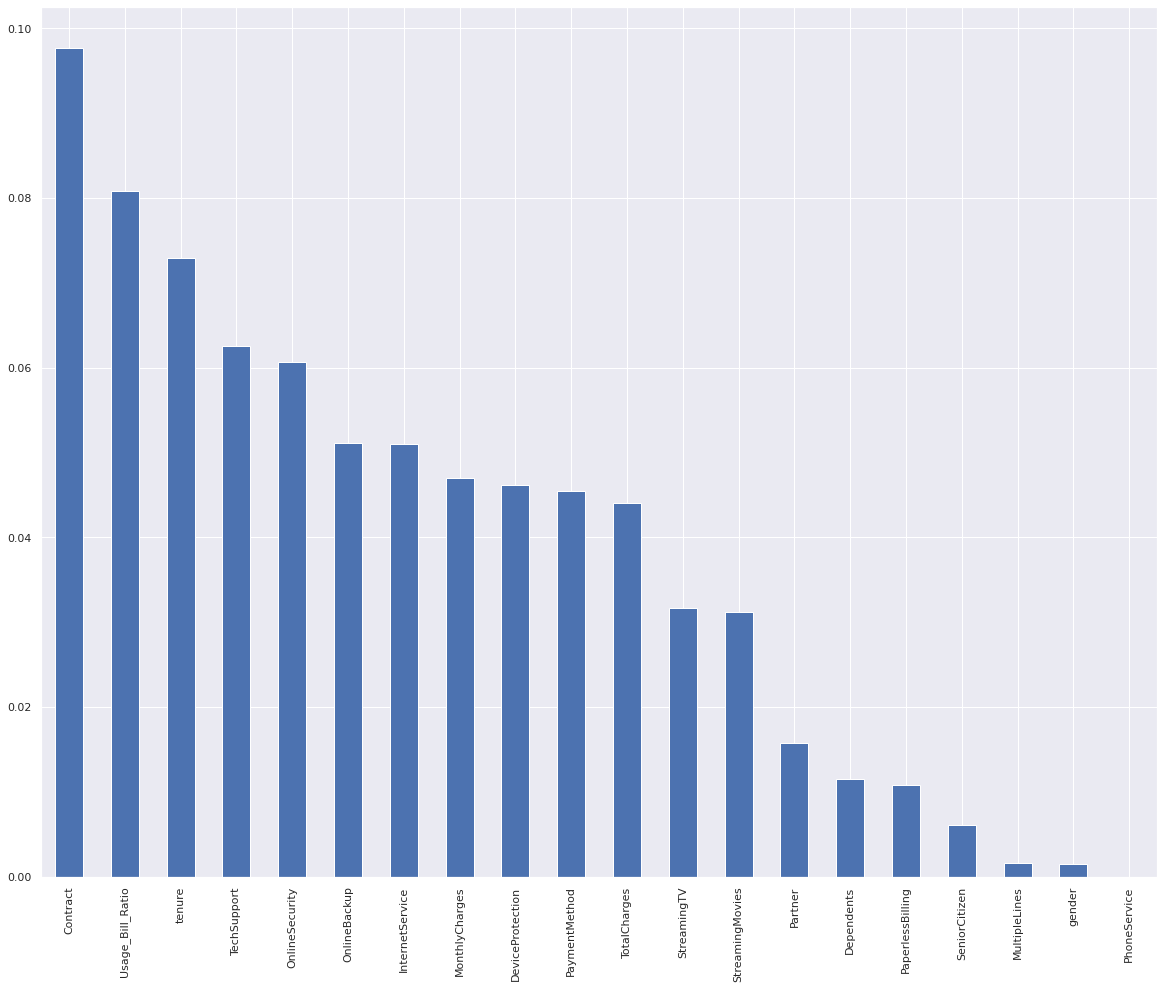

In [1022]:
mi_score1.sort_values(ascending=False).plot.bar(figsize=(20,16))

In [1023]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.3,random_state=0)

In [1024]:
print("train_data :",train_data.shape)
print("train_label :",train_label.shape)
print("test_data :",test_data.shape)
print("test_label :",test_label.shape)

train_data : (4930, 20)
train_label : (4930,)
test_data : (2113, 20)
test_label : (2113,)


In [1025]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [1026]:
print(train_data_sc)

[[-1.00040576 -0.43584282 -0.97515638 ...  0.2679385  -0.72323288
  -0.16025275]
 [ 0.9995944  -0.43584282  1.02547655 ...  0.59379741 -0.48657117
  -0.30971412]
 [-1.00040576 -0.43584282  1.02547655 ... -0.56926825  0.38383476
  -0.50305167]
 ...
 [ 0.9995944  -0.43584282  1.02547655 ... -1.47498893 -0.48614983
  -0.49492044]
 [ 0.9995944   2.29440511 -0.97515638 ...  0.162661   -0.98120567
   2.98765861]
 [-1.00040576 -0.43584282 -0.97515638 ... -1.48668643 -0.97022858
   0.20824432]]


In [1027]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [1028]:
explained_variance = pc.explained_variance_ratio_

In [1029]:
print("Explained Varinace Rations :",explained_variance)

Explained Varinace Rations : [0.23211528 0.11694404 0.07454551 0.06077013 0.05337153 0.04987509
 0.047265   0.04353906 0.04127975 0.0404129  0.03631618 0.03502756
 0.03374032 0.03122861 0.0278463  0.02630464 0.02217317 0.01534072
 0.00939073 0.00251348]


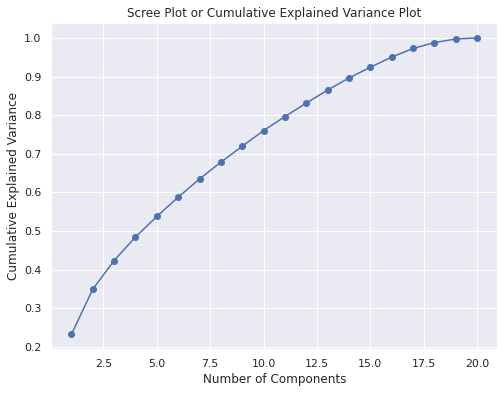

In [1030]:
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1,len(explained_variance) + 1), cumulative_variance,marker='o', linestyle = '-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [1031]:
cumulative_variance = np.cumsum(explained_variance)
desired_variance = 0.95
num_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"\nNumber of Components Selected: {num_components}")


Number of Components Selected: 16


In [1032]:
pc = PCA(n_components=16)
train_data_sc_pc_select = pc.fit_transform(train_data_sc)
test_data_sc_pc_select = pc.fit_transform(test_data_sc)

In [1033]:
explained_variance  = pc.explained_variance_ratio_

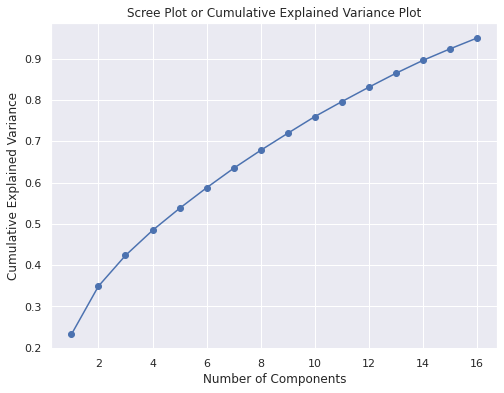

In [1034]:
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1,len(explained_variance) + 1), cumulative_variance,marker='o', linestyle = '-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [1035]:
print("train_data :",train_data_sc_pc_select.shape)
print("test_data :",test_data_sc_pc_select.shape)

train_data : (4930, 16)
test_data : (2113, 16)


In [1036]:
model_lr = LogisticRegression()

In [1037]:
model_lr.fit(train_data_sc_pc_select, train_label)

LogisticRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression()

In [1038]:
y_pred = model_lr.predict(test_data_sc_pc_select)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [1039]:
print("Accuracy_Score :", accuracy_score(y_pred, test_label))

Accuracy_Score : 0.6057737813535258


In [1040]:
confusion_matrix(y_pred,test_label)

array([[1210, 483],
 [ 350, 70]])

In [1041]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1693
           1       0.13      0.17      0.14       420

    accuracy                           0.61      2113
   macro avg       0.45      0.44      0.44      2113
weighted avg       0.65      0.61      0.62      2113



In [1042]:
print("Cross _Val_Score Train Data : ", cross_val_score(model_lr,train_data_sc_pc_select,train_label, cv=5).mean())
print("Cross _Val_Score Test_Data : ", cross_val_score(model_lr,test_data_sc_pc_select,test_label,cv=5).mean())

Cross _Val_Score Train Data :  0.8016227180527384
Cross _Val_Score Test_Data :  0.79128992862985


In [1043]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1,10, 100]}

model_lr = LogisticRegression()
grid_search = GridSearchCV(model_lr, param_grid, cv=5)
grid_search.fit(train_data_sc_pc_select,train_label)
best_params = grid_search.best_params_
print("Best Hyperparameters :", best_params)
best_score = grid_search.best_score_
print("best SCORE : ", best_score)

Best Hyperparameters : {'C': 10}
best SCORE :  0.8018255578093306


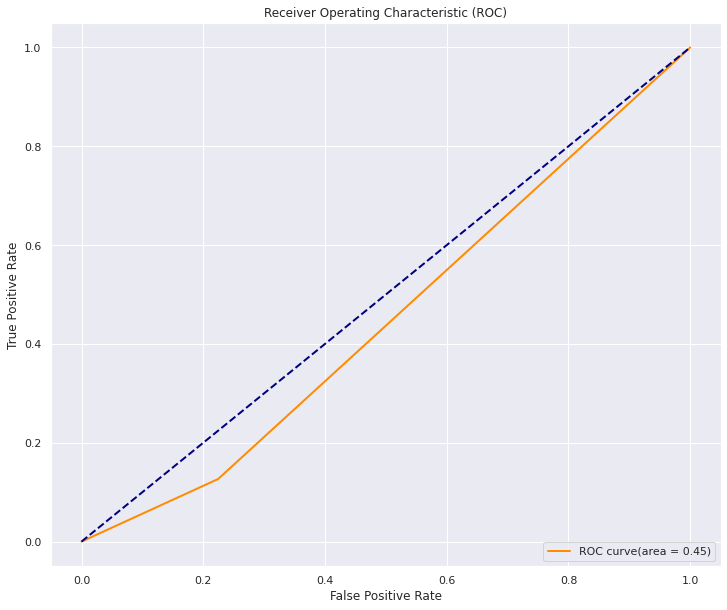

In [1045]:
from sklearn.metrics._plot.roc_curve import auc

fpr, tpr, thresholds = roc_curve(test_label,y_pred)

roc_auc = auc (fpr,tpr)

plt.figure(figsize=(12,10))
plt.plot(fpr,tpr, color = "darkorange", lw=2, label ="ROC curve(area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color ='navy',lw=2, linestyle ='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()         